## DeepSat (SAT-6) Airborne Dataset Analysis
### Purpose is to characterize the DeepSat Data/images into categories accurately
+ First step will be to be able to feed the data into a simple CNN using Batch Normalization and check the performance

+ Simple CNN performance characterized
- With 50000 train-images and 4000 test-images
    - {'Accuracy': 0.877, 'Precision': 0.9708216, 'Recall': 0.9918933, 'loss': 0.3487776, 'global_step': 98}
- With 100000 train-images and 10000 test-images and nearly 2000 Steps
    - {'Accuracy': 0.887, 'Precision': 0.99013156, 'Recall': 0.9774775, 'loss': 0.25368488, 'global_step': 196}
- With 324000 Train-images without BN and full test set
    - {'Accuracy': 0.9612716, 'Precision': 0.99837404, 'Recall': 0.99309057, 'loss': 0.10279003, 'global_step': 6000}
- With 324000 Train-images with BN and full test set
    - {'Accuracy': 0.97649384, 'Precision': 0.9990764, 'Recall': 0.9937375, 'loss': 0.06860507, 'global_step': 6000}
- With 50000 Train-images, run locally with GN
    - 

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
tf.__version__

'1.11.0'

In [5]:
from ops import norm

In [6]:
#path_a = os.getcwd()+"\deepsat-sat6"
path_a = "C:\Public\\xrelab\Xrelab\\final-project\datasets\crawford\deepsat-sat6"
print(f"path of the project : {path_a}")

# Print the contents of the path
from glob import glob
trainfiles, testfiles = [],[]
to_scan = path_a+"\*.csv"

for f in glob(to_scan):
    print(f)
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

print(trainfiles, testfiles)
# xtrain.iloc[0:0]
# ytrain.iloc[0:0]
# x_train.iloc[0:0]
# y_train.iloc[0:0]
xtrain = pd.read_csv(tf.gfile.Open(trainfiles[0]), nrows=50000, header=None) # change the nrows here
ytrain = pd.read_csv(tf.gfile.Open(trainfiles[1]), nrows=50000, header=None) # change the nrows here
x_train = xtrain.values.reshape((xtrain.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_train = ytrain.values.astype(np.float32)

path of the project : C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6
C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6\sat6annotations.csv
C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6\X_test_sat6.csv
C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6\X_train_sat6.csv
C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6\y_test_sat6.csv
C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6\y_train_sat6.csv
['C:\\Public\\xrelab\\Xrelab\\final-project\\datasets\\crawford\\deepsat-sat6\\X_train_sat6.csv', 'C:\\Public\\xrelab\\Xrelab\\final-project\\datasets\\crawford\\deepsat-sat6\\y_train_sat6.csv'] ['C:\\Public\\xrelab\\Xrelab\\final-project\\datasets\\crawford\\deepsat-sat6\\X_test_sat6.csv', 'C:\\Public\\xrelab\\Xrelab\\final-project\\datasets\\crawford\\deepsat-sat6\\y_test_sat6.csv']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

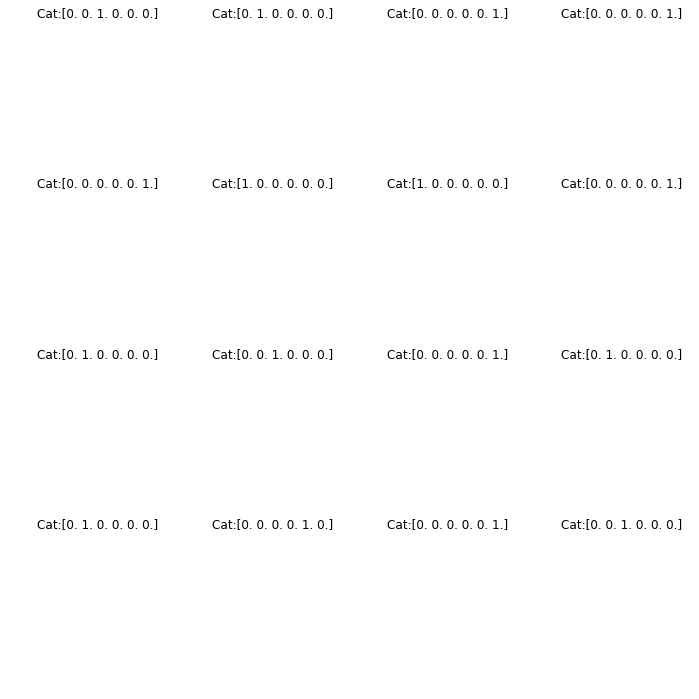

In [7]:
import matplotlib.pyplot as plt
c_train_x, c_train_y = x_train[0:16],y_train[0:16] 
fig, m_axs = plt.subplots(4, c_train_x.shape[0]//4, figsize = (12, 12))
for (x, y, c_ax) in zip(c_train_x, c_train_y, m_axs.flatten()):
    c_ax.imshow(x[:,:,:3],interpolation = 'none')
    c_ax.axis('off')
    c_ax.set_title('Cat:{}'.format(y))

In [8]:
xtest = pd.read_csv(tf.gfile.Open(testfiles[0]), nrows=4000, header=None) # change nrows to 81000
ytest = pd.read_csv(tf.gfile.Open(testfiles[1]), nrows=4000, header=None) # change nrows to 81000
x_test = xtest.values.reshape((xtest.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_test = ytest.values.astype(np.float32)

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 28, 28, 4) (50000, 6) (4000, 28, 28, 4) (4000, 6)


In [10]:
'''
Without any Batch Normalization, checking the performance for the total Training set
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here
def cnn_model_fn(features, labels, mode, params, config):
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('loss', loss)
        tf.summary.scalar('F1Score', f1)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [13]:
'''
Printing out the losses per step
- Number of steps kept at 6000
- Number of epochs kept at 3 each for train and test
- No Batch Norm used for the 1st set of results
'''
loss_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="C:/Users/Paperspace/Image_Analysis/cnn_model/1",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
from tqdm import tqdm
store_dict=defaultdict(dict)
for i in tqdm(range(10)):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=600, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {'_model_dir': 'C:/Users/Paperspace/Image_Analysis/cnn_model/1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AA3E9CB6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}



  0%|                                                                                                                                                       | 0/10 [00:00<?, ?it/s]

This is the 0 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 4.658491, probabilities = [[0.03628146 0.00524792 0.9275069  0.01569822 0.00102851 0.01423702]
 [0.00743121 0.00348581 0.2923017  0.0000764  0.0000326  0.69667226]
 [0.00028684 0.00925582 0.8100243  0.00519342 0.00005873 0.17518082]
 ...
 [0.00031184 0.00083351 0.99759823 0.00005089 0.00004565 0.00115983]
 [0.00051242 0.00107078 0.5281816  0.00134642 0.00001879 0.46887   ]
 [0.00115196 0.04453951 0.7792054  0.00012265 0.00145364 0.1735269 ]]
INFO:tensorflow:loss = 4.658491, step = 1
INFO:tensorfl

INFO:tensorflow:loss = 0.40640956, probabilities = [[0.00618608 0.0000823  0.00029485 0.00012386 0.00034199 0.9929709 ]
 [0.01043331 0.41725004 0.06428526 0.501396   0.00230612 0.00432928]
 [0.00327474 0.977289   0.00426263 0.01226342 0.00106609 0.00184407]
 ...
 [0.00027211 0.2686753  0.00686228 0.72323304 0.00081397 0.00014329]
 [0.00201138 0.00008208 0.00093728 0.00006588 0.06256785 0.9343355 ]
 [0.00521696 0.09934792 0.31313097 0.5603973  0.02072189 0.00118501]] (9.761 sec)
INFO:tensorflow:loss = 0.38809067, probabilities = [[0.00206904 0.00029391 0.00489017 0.00017082 0.00260682 0.9899692 ]
 [0.00055285 0.9609428  0.0045232  0.02655962 0.00726568 0.00015578]
 [0.0165772  0.6983255  0.01664338 0.26304427 0.00528874 0.00012086]
 ...
 [0.00364271 0.51641154 0.06130743 0.41660637 0.00169013 0.00034185]
 [0.00520692 0.00002484 0.00336142 0.00004632 0.00136266 0.9899978 ]
 [0.00125039 0.95672053 0.00191694 0.0379879  0.0017795  0.00034467]] (9.900 sec)
INFO:tensorflow:loss = 0.5308335, 

INFO:tensorflow:loss = 1.0325296, probabilities = [[0.00179312 0.7785038  0.00456887 0.19579731 0.01926592 0.00007096]
 [0.08156405 0.00521207 0.00017437 0.00091266 0.05943249 0.85270435]
 [0.00222593 0.93834066 0.00284492 0.04604596 0.010362   0.00018058]
 ...
 [0.01492527 0.6192553  0.04212006 0.30426034 0.01752497 0.00191408]
 [0.00227029 0.48282498 0.08904421 0.42544046 0.00039766 0.00002241]
 [0.07969505 0.0058785  0.0006041  0.00173437 0.11386272 0.7982252 ]] (9.834 sec)
INFO:tensorflow:loss = 0.36699703, probabilities = [[0.01150814 0.00363292 0.7641422  0.21796404 0.00262812 0.00012455]
 [0.00130859 0.8513135  0.00291831 0.14334014 0.00092043 0.00019912]
 [0.00001322 0.00000065 0.00000304 0.00000602 0.00023243 0.9997446 ]
 ...
 [0.00000237 0.00000003 0.00000273 0.0000003  0.00000811 0.9999864 ]
 [0.01975869 0.00002636 0.0001411  0.00000976 0.00252404 0.97754   ]
 [0.00103995 0.7072609  0.14052564 0.15027484 0.00073365 0.00016491]] (9.802 sec)
INFO:tensorflow:loss = 0.42371175, 

INFO:tensorflow:global_step/sec: 1.02177
INFO:tensorflow:loss = 0.24317561, probabilities = [[0.00019769 0.05770187 0.01523379 0.9258991  0.00081626 0.00015128]
 [0.00113623 0.09624875 0.15066504 0.7501241  0.00178123 0.00004461]
 [0.00203688 0.00000183 0.00018288 0.00001372 0.00125938 0.9965054 ]
 ...
 [0.00003662 0.00000389 0.00014156 0.00000614 0.00001162 0.99980015]
 [0.03359053 0.5794118  0.20956607 0.1744302  0.00234569 0.00065576]
 [0.00033142 0.62673545 0.0044596  0.3676441  0.00043779 0.00039165]] (9.752 sec)
INFO:tensorflow:loss = 0.24317561, step = 501 (97.872 sec)
INFO:tensorflow:loss = 0.29569227, probabilities = [[0.00551591 0.95659953 0.00329293 0.03149806 0.00295735 0.00013619]
 [0.00623807 0.0000213  0.00002314 0.00014723 0.00263998 0.99093026]
 [0.00001363 0.00000087 0.00004854 0.00000224 0.00095759 0.9989772 ]
 ...
 [0.00108718 0.00025537 0.9942589  0.00423511 0.00014291 0.00002052]
 [0.00141319 0.00002453 0.00029309 0.0000263  0.00435113 0.9938917 ]
 [0.30655152 0.6


 10%|██████████████                                                                                                                              | 1/10 [13:07<1:58:03, 787.07s/it]

This is the 1 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 600 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.31471944, probabilities = [[0.00049269 0.00000759 0.0001572  0.00000551 0.00120138 0.99813557]
 [0.00000226 0.00000106 0.00001202 0.00000371 0.00002569 0.9999553 ]
 [0.00073824 0.98465526 0.00860908 0.00419101 0.00172703 0.00007938]
 ...
 [0.00067302 0.00016747 0.00043598 0.00020799 0.00041891 0.99809664]
 [0.00038498 0.00728097 0.90703255 0.08432245 0.00091873 0.00006033]
 [0.00007169 0.00

INFO:tensorflow:loss = 0.48913413, probabilities = [[0.01965901 0.07217005 0.18988818 0.6918239  0.02589976 0.00055916]
 [0.01053657 0.10551451 0.05258694 0.83068895 0.00041253 0.00026042]
 [0.00011752 0.01662275 0.02483817 0.9581467  0.00023411 0.00004071]
 ...
 [0.00028746 0.00005329 0.00005269 0.00009012 0.00035483 0.9991616 ]
 [0.00000344 0.00038654 0.0115807  0.9879252  0.00004798 0.00005623]
 [0.00623817 0.88362944 0.00352738 0.09517445 0.00977194 0.00165866]] (9.813 sec)
INFO:tensorflow:loss = 0.19424297, probabilities = [[0.00368212 0.6234967  0.0121185  0.3600979  0.00051236 0.00009241]
 [0.00086484 0.01519942 0.05134077 0.9316046  0.00050955 0.00048077]
 [0.00008055 0.00000203 0.00000978 0.00000371 0.00006503 0.9998388 ]
 ...
 [0.00036235 0.00000312 0.00005424 0.00001472 0.0029108  0.99665475]
 [0.00130414 0.00040751 0.00031595 0.0007148  0.01665749 0.98060006]
 [0.00134355 0.00756171 0.34897792 0.6413961  0.00061193 0.0001088 ]] (9.671 sec)
INFO:tensorflow:loss = 0.25621346,

INFO:tensorflow:loss = 0.18410823, probabilities = [[0.05776494 0.2541064  0.28415218 0.39481792 0.00764086 0.00151763]
 [0.00236855 0.2276772  0.0357595  0.73355764 0.00016675 0.0004704 ]
 [0.00006966 0.00000372 0.00011812 0.00001506 0.0001156  0.9996779 ]
 ...
 [0.00103154 0.9564276  0.00062703 0.04118211 0.00059641 0.00013539]
 [0.00057986 0.00001012 0.00000716 0.00002552 0.00088665 0.9984907 ]
 [0.00111697 0.00000298 0.00180175 0.00000858 0.00956338 0.9875064 ]] (9.574 sec)
INFO:tensorflow:loss = 0.23574461, probabilities = [[0.01125819 0.52814746 0.10097566 0.35142237 0.00363488 0.00456133]
 [0.00022926 0.00000176 0.00005519 0.0000024  0.00015885 0.99955255]
 [0.00028384 0.00189641 0.986603   0.01073014 0.0003847  0.00010189]
 ...
 [0.00107513 0.9818918  0.00121098 0.01479956 0.00060087 0.00042169]
 [0.00006931 0.99440116 0.00009472 0.00541413 0.00001352 0.00000712]
 [0.00032574 0.00000012 0.00017689 0.0000018  0.00049001 0.9990055 ]] (9.708 sec)
INFO:tensorflow:loss = 0.247766, p

INFO:tensorflow:global_step/sec: 1.02296
INFO:tensorflow:loss = 0.18877906, probabilities = [[0.00012391 0.00010262 0.995893   0.00360775 0.00023329 0.00003944]
 [0.00248848 0.9312561  0.00479542 0.06090466 0.00049245 0.00006288]
 [0.02227521 0.00002221 0.00019428 0.00001799 0.00995645 0.9675339 ]
 ...
 [0.0003937  0.00000748 0.00004604 0.00001741 0.00117738 0.99835795]
 [0.00133129 0.9261871  0.00044749 0.07174493 0.00026245 0.00002668]
 [0.00001694 0.         0.00001109 0.00000008 0.00000954 0.99996233]] (9.653 sec)
INFO:tensorflow:loss = 0.18877906, step = 1101 (97.754 sec)
INFO:tensorflow:loss = 0.30714667, probabilities = [[0.00329066 0.09086007 0.03450965 0.86844456 0.0026845  0.00021062]
 [0.0041921  0.7997459  0.00153814 0.19379677 0.00058236 0.00014473]
 [0.00050048 0.02916876 0.01295638 0.95536673 0.00187747 0.00013018]
 ...
 [0.00082858 0.00763105 0.1959842  0.7951424  0.00014516 0.00026859]
 [0.00337111 0.21897402 0.19544014 0.57677656 0.003953   0.00148523]
 [0.00004415 0.


 20%|████████████████████████████                                                                                                                | 2/10 [26:09<1:44:45, 785.68s/it]

This is the 2 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1200 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.16546893, probabilities = [[0.00088508 0.81028247 0.00596121 0.18120362 0.0015125  0.00015508]
 [0.65801585 0.0020902  0.00515454 0.00907067 0.26805496 0.05761371]
 [0.00007975 0.00000529 0.9969813  0.00291809 0.00000863 0.00000682]
 ...
 [0.00001638 0.00000005 0.00000929 0.00000206 0.00006677 0.99990547]
 [0.00186573 0.9668258  0.00064709 0.02785547 0.00192796 0.00087803]
 [0.4021261  0.

INFO:tensorflow:loss = 0.16170791, probabilities = [[0.00000549 0.00000076 0.00029402 0.00000059 0.00000198 0.9996972 ]
 [0.00016859 0.00012502 0.9993874  0.00017655 0.00012406 0.0000184 ]
 [0.70235246 0.00050537 0.00051489 0.00080686 0.29408535 0.00173496]
 ...
 [0.00044751 0.8860069  0.01692214 0.08574653 0.01045574 0.00042106]
 [0.00241147 0.0000006  0.00011588 0.00003479 0.00055499 0.9968823 ]
 [0.02698667 0.00006086 0.00042424 0.00012257 0.00069088 0.9717148 ]] (9.823 sec)
INFO:tensorflow:loss = 0.16111054, probabilities = [[0.00079619 0.8674135  0.00973272 0.11958549 0.00240181 0.0000702 ]
 [0.00112779 0.00000181 0.00003609 0.00000614 0.00021469 0.9986135 ]
 [0.00328302 0.46373734 0.01059637 0.52192557 0.00041139 0.00004631]
 ...
 [0.00603972 0.1076007  0.36788523 0.49856147 0.01347002 0.00644281]
 [0.00232576 0.22907282 0.02244689 0.7455085  0.00024837 0.00039757]
 [0.00004662 0.00046283 0.21577676 0.78291863 0.00018335 0.00061185]] (9.669 sec)
INFO:tensorflow:loss = 0.1599656, 

INFO:tensorflow:loss = 0.12292731, probabilities = [[0.00283777 0.00287964 0.9575244  0.03605456 0.00065564 0.00004794]
 [0.0000381  0.01086296 0.81735384 0.17090487 0.00076315 0.00007711]
 [0.00041861 0.00000538 0.00013031 0.00032336 0.00064119 0.9984812 ]
 ...
 [0.00902568 0.9730387  0.0003744  0.01612117 0.00139541 0.00004461]
 [0.00054743 0.9736821  0.00015419 0.02306693 0.00251127 0.00003815]
 [0.00023557 0.00000028 0.00006631 0.00000719 0.00015697 0.99953365]] (9.610 sec)
INFO:tensorflow:loss = 0.1474978, probabilities = [[0.00012834 0.8995834  0.00074714 0.09923393 0.00018459 0.00012259]
 [0.00006278 0.00000235 0.00658116 0.00000324 0.00063152 0.99271894]
 [0.00305501 0.05706394 0.01816838 0.92018795 0.00095522 0.00056956]
 ...
 [0.00007678 0.9736596  0.00002161 0.0262086  0.00001122 0.00002222]
 [0.00001992 0.         0.00001512 0.00000011 0.00000346 0.9999614 ]
 [0.0002588  0.9717045  0.00036172 0.0269728  0.00066081 0.00004136]] (9.763 sec)
INFO:tensorflow:loss = 0.16577663, 

INFO:tensorflow:global_step/sec: 1.02984
INFO:tensorflow:loss = 0.13315693, probabilities = [[0.00005573 0.9932575  0.00001392 0.00664201 0.00002397 0.00000685]
 [0.00103984 0.21271136 0.01009971 0.77287614 0.00266669 0.00060624]
 [0.00027362 0.00001577 0.00260678 0.00034464 0.00071064 0.9960485 ]
 ...
 [0.00224647 0.71862763 0.00659282 0.2699544  0.00214587 0.00043282]
 [0.00016008 0.00000257 0.00002899 0.00001104 0.00008915 0.9997081 ]
 [0.00003608 0.00000009 0.00004565 0.00000024 0.00000876 0.99990916]] (9.687 sec)
INFO:tensorflow:loss = 0.13315693, step = 1701 (97.101 sec)
INFO:tensorflow:loss = 0.13327363, probabilities = [[0.00018426 0.00014305 0.9938559  0.00568708 0.00009884 0.00003081]
 [0.00049378 0.00050975 0.99056727 0.00762113 0.0007169  0.00009124]
 [0.00023    0.99444467 0.0000374  0.00506321 0.00018685 0.00003792]
 ...
 [0.00256467 0.9402984  0.00049396 0.05423887 0.00230122 0.00010276]
 [0.00048911 0.9757446  0.00009624 0.02353819 0.00011474 0.00001726]
 [0.00001349 0.


 30%|██████████████████████████████████████████                                                                                                  | 3/10 [39:12<1:31:33, 784.81s/it]

This is the 3 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-1800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1800 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.44189203, probabilities = [[0.00015065 0.05090578 0.00310518 0.94517493 0.00050184 0.00016163]
 [0.0006032  0.9570775  0.00158605 0.03993886 0.00077127 0.00002316]
 [0.0002386  0.00286381 0.49499503 0.50155973 0.00023385 0.00010893]
 ...
 [0.00009706 0.0000005  0.00002078 0.00000308 0.00012009 0.99975854]
 [0.0000893  0.00513807 0.01984576 0.97408694 0.00046039 0.00037952]
 [0.00001156 0.

INFO:tensorflow:loss = 0.15589872, probabilities = [[0.00003784 0.00000398 0.00011243 0.00003444 0.00019355 0.9996177 ]
 [0.0000037  0.00000033 0.00000957 0.00000969 0.00001507 0.9999616 ]
 [0.00000032 0.00000002 0.00000857 0.00000002 0.00000025 0.9999908 ]
 ...
 [0.03237625 0.03086758 0.79460466 0.13826269 0.00248074 0.00140817]
 [0.00000585 0.00000017 0.00000131 0.0000007  0.00008897 0.99990296]
 [0.00018251 0.00000082 0.0000265  0.00001179 0.00005254 0.99972576]] (9.866 sec)
INFO:tensorflow:loss = 0.18067692, probabilities = [[0.00068344 0.00010344 0.9936604  0.00530327 0.00011048 0.0001389 ]
 [0.00002278 0.00000007 0.00000206 0.00000054 0.00000808 0.9999665 ]
 [0.00141947 0.05307043 0.00712334 0.937368   0.00032903 0.00068972]
 ...
 [0.0000635  0.00000454 0.0002547  0.00005468 0.00041134 0.9992112 ]
 [0.00186415 0.00004403 0.00082957 0.00010759 0.00083341 0.9963213 ]
 [0.00009601 0.00000008 0.00010539 0.00000081 0.00003322 0.9997645 ]] (9.544 sec)
INFO:tensorflow:loss = 0.13956544,

INFO:tensorflow:loss = 0.13645193, probabilities = [[0.7546849  0.00119189 0.00015205 0.00351887 0.23902121 0.00143104]
 [0.00001205 0.00000027 0.00010793 0.00000303 0.00001722 0.99985945]
 [0.00010541 0.99639386 0.00001715 0.0033476  0.00013217 0.00000389]
 ...
 [0.00004234 0.00000001 0.0000422  0.00000004 0.00000144 0.99991393]
 [0.0012162  0.00040539 0.99240476 0.00490722 0.00095798 0.0001084 ]
 [0.00002934 0.00000003 0.00000576 0.00000072 0.00006108 0.9999031 ]] (9.626 sec)
INFO:tensorflow:loss = 0.13363892, probabilities = [[0.00001579 0.00000012 0.00001852 0.00000308 0.00006435 0.9998981 ]
 [0.00183295 0.74999565 0.01424597 0.21673827 0.01651445 0.00067284]
 [0.00004369 0.00000035 0.00015376 0.00000691 0.00001048 0.9997849 ]
 ...
 [0.7141031  0.00085392 0.00029566 0.00086518 0.27939603 0.00448616]
 [0.00053286 0.9302119  0.00030683 0.06869578 0.00021678 0.00003596]
 [0.00001868 0.00162481 0.00170989 0.99641377 0.00017046 0.00006252]] (9.746 sec)
INFO:tensorflow:loss = 0.13629213,

INFO:tensorflow:global_step/sec: 1.02068
INFO:tensorflow:loss = 0.17163895, probabilities = [[0.00003234 0.00000008 0.00002779 0.00000019 0.00001267 0.9999269 ]
 [0.00009029 0.00016848 0.99738127 0.00231247 0.00001046 0.00003712]
 [0.0091133  0.4998817  0.08441015 0.39389548 0.01254    0.00015929]
 ...
 [0.0000758  0.00000023 0.0000556  0.00000673 0.00030631 0.9995553 ]
 [0.00062087 0.04237343 0.00882748 0.94701505 0.00102551 0.00013757]
 [0.00000487 0.00002016 0.9979944  0.00197185 0.00000585 0.00000297]] (9.991 sec)
INFO:tensorflow:loss = 0.17163895, step = 2301 (97.973 sec)
INFO:tensorflow:loss = 0.12708598, probabilities = [[0.0000371  0.00000063 0.0000126  0.00000382 0.00003576 0.9999101 ]
 [0.00370637 0.00003847 0.00018109 0.00002246 0.00028195 0.99576974]
 [0.00115635 0.00023356 0.9977762  0.00071862 0.00007602 0.00003928]
 ...
 [0.00198823 0.00001001 0.00004827 0.00003915 0.00046414 0.9974502 ]
 [0.00044903 0.11279903 0.00458206 0.88085717 0.00124289 0.0000698 ]
 [0.00021267 0.


 40%|████████████████████████████████████████████████████████                                                                                    | 4/10 [52:17<1:18:29, 784.86s/it]

This is the 4 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2400 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.16468054, probabilities = [[0.00008182 0.00000054 0.00018433 0.00002274 0.00010637 0.9996043 ]
 [0.6821505  0.0068286  0.00233576 0.0587818  0.24776322 0.00214022]
 [0.00008653 0.01358201 0.00247186 0.983528   0.00022521 0.0001064 ]
 ...
 [0.00014616 0.00000095 0.0001634  0.00001277 0.00003236 0.9996444 ]
 [0.00010125 0.00003959 0.9973036  0.00224996 0.000173   0.00013257]
 [0.00006234 0.

INFO:tensorflow:loss = 0.12461666, probabilities = [[0.00088884 0.86367905 0.00012912 0.13478772 0.00049644 0.00001888]
 [0.00004656 0.00000075 0.9988194  0.00108495 0.0000405  0.00000791]
 [0.00010164 0.000003   0.00000273 0.00001766 0.00052557 0.9993494 ]
 ...
 [0.0001059  0.98072916 0.00008373 0.01904363 0.00002141 0.00001608]
 [0.00029866 0.00000013 0.00004941 0.00000144 0.00024915 0.9994012 ]
 [0.00075035 0.00163679 0.23985586 0.7561286  0.00097541 0.00065306]] (9.623 sec)
INFO:tensorflow:loss = 0.15606138, probabilities = [[0.00014133 0.01075543 0.00717013 0.98140126 0.00041639 0.0001155 ]
 [0.00006274 0.         0.00053275 0.00000143 0.00017312 0.9992299 ]
 [0.0000495  0.04103862 0.0009244  0.9577845  0.00010675 0.00009627]
 ...
 [0.00001223 0.00000005 0.00002055 0.00000748 0.00002254 0.9999372 ]
 [0.00006501 0.00000003 0.00003259 0.00000026 0.00000855 0.99989355]
 [0.000302   0.9100308  0.00160739 0.08754694 0.00049455 0.00001837]] (9.625 sec)
INFO:tensorflow:loss = 0.12545472,

INFO:tensorflow:loss = 0.15128472, probabilities = [[0.00092807 0.9645037  0.00173707 0.03046812 0.00222822 0.00013478]
 [0.0001062  0.98554915 0.0004822  0.01346823 0.00029005 0.00010427]
 [0.00004837 0.35229355 0.0013093  0.6461284  0.00015474 0.00006561]
 ...
 [0.00018872 0.7710457  0.00084382 0.22719865 0.00061743 0.00010569]
 [0.00001329 0.9900545  0.00001209 0.00989691 0.00002099 0.00000219]
 [0.00001922 0.00000013 0.00000072 0.00000327 0.00002737 0.99994934]] (9.658 sec)
INFO:tensorflow:loss = 0.14493424, probabilities = [[0.00020387 0.02075036 0.00493211 0.9731591  0.00052106 0.00043336]
 [0.00125989 0.00000002 0.00018134 0.0001377  0.00086341 0.99755764]
 [0.00010983 0.00000007 0.00007215 0.00000013 0.00004108 0.9997768 ]
 ...
 [0.00014437 0.9334235  0.00024116 0.0659995  0.00018334 0.00000812]
 [0.00032868 0.00086667 0.9415204  0.05559063 0.0006695  0.00102422]
 [0.00003281 0.00000002 0.00005785 0.00000143 0.00000437 0.99990356]] (9.905 sec)
INFO:tensorflow:loss = 0.15398274,

INFO:tensorflow:global_step/sec: 1.02658
INFO:tensorflow:loss = 0.20600536, probabilities = [[0.00059695 0.00014008 0.99523664 0.00376381 0.00013394 0.00012856]
 [0.00138244 0.5638612  0.0049292  0.41936797 0.01027808 0.00018106]
 [0.00013021 0.00000036 0.00001844 0.00000485 0.00002277 0.9998234 ]
 ...
 [0.00057977 0.9943773  0.00011509 0.00469486 0.00016782 0.00006511]
 [0.00025264 0.00047426 0.9946833  0.00434809 0.00015161 0.00009014]
 [0.00126153 0.00318628 0.9334473  0.0599272  0.00148663 0.00069102]] (9.600 sec)
INFO:tensorflow:loss = 0.20600536, step = 2901 (97.409 sec)
INFO:tensorflow:loss = 0.10745789, probabilities = [[0.0001268  0.96450084 0.00005058 0.03527891 0.00002196 0.00002098]
 [0.00057849 0.00204646 0.98707414 0.00912227 0.00108151 0.00009721]
 [0.00013897 0.03773742 0.00419981 0.95640343 0.00149555 0.0000249 ]
 ...
 [0.00023443 0.9552679  0.00022287 0.04282327 0.00144822 0.00000336]
 [0.00046827 0.00000287 0.00000659 0.0000087  0.00061401 0.9988996 ]
 [0.9362165  0.


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 5/10 [1:05:21<1:05:23, 784.66s/it]

This is the 5 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3000 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.123372786, probabilities = [[0.00008562 0.98767775 0.00005616 0.01200968 0.00012895 0.00004188]
 [0.0001084  0.00001092 0.9996457  0.00021723 0.00001013 0.00000768]
 [0.00000137 0.00000001 0.00000865 0.00000001 0.00000208 0.99998784]
 ...
 [0.00021741 0.00000558 0.999366   0.00034097 0.00006465 0.00000535]
 [0.00024716 0.9865993  0.0000338  0.01302731 0.00006627 0.00002623]
 [0.00038603 0

INFO:tensorflow:loss = 0.12405606, probabilities = [[0.00094412 0.0000003  0.00000182 0.00000936 0.00182892 0.9972155 ]
 [0.00069645 0.80944    0.00032989 0.18739517 0.0019899  0.00014856]
 [0.00000171 0.00000001 0.00000018 0.00000025 0.00000141 0.9999964 ]
 ...
 [0.00051223 0.93854666 0.00020674 0.06029636 0.00031674 0.00012133]
 [0.83550423 0.00081493 0.00011629 0.0007542  0.16268292 0.00012741]
 [0.16903692 0.00271355 0.00044986 0.00351534 0.8239092  0.00037508]] (9.800 sec)
INFO:tensorflow:loss = 0.14975277, probabilities = [[0.00000691 0.9725801  0.00000879 0.02737129 0.00002781 0.00000507]
 [0.00016847 0.93793976 0.00008    0.06132729 0.00048082 0.00000364]
 [0.00507536 0.00193549 0.98426276 0.00688018 0.0014777  0.00036842]
 ...
 [0.00571197 0.00000572 0.00010737 0.00010514 0.01256135 0.98150843]
 [0.39114207 0.00021827 0.00056884 0.0020593  0.6049689  0.00104264]
 [0.35698703 0.001271   0.0005429  0.00565624 0.6345398  0.00100312]] (9.672 sec)
INFO:tensorflow:loss = 0.13958675,

INFO:tensorflow:loss = 0.16110726, probabilities = [[0.00137154 0.0000001  0.00042992 0.00000054 0.00464431 0.99355364]
 [0.00012544 0.9838335  0.00013698 0.01526023 0.00063772 0.00000611]
 [0.0005298  0.00004406 0.9982406  0.00054316 0.00055236 0.00009003]
 ...
 [0.0000064  0.97012746 0.00002943 0.02981488 0.00001747 0.00000437]
 [0.0000539  0.05892126 0.00150967 0.93839264 0.00108483 0.00003767]
 [0.00003669 0.00000013 0.00000086 0.00000023 0.00002352 0.9999386 ]] (9.623 sec)
INFO:tensorflow:loss = 0.13283622, probabilities = [[0.00045669 0.00000006 0.00000901 0.0000007  0.0000853  0.99944824]
 [0.00003784 0.00000027 0.0000129  0.00000024 0.00020871 0.99974006]
 [0.96350557 0.00036768 0.0002054  0.00295167 0.0319443  0.00102551]
 ...
 [0.00001179 0.00174424 0.96523774 0.03295929 0.00002821 0.0000188 ]
 [0.00000142 0.00000003 0.00000026 0.00000031 0.0004963  0.9995017 ]
 [0.0011103  0.00000321 0.00190593 0.00001339 0.00003344 0.9969337 ]] (9.755 sec)
INFO:tensorflow:loss = 0.1252003, 

INFO:tensorflow:global_step/sec: 1.03418
INFO:tensorflow:loss = 0.26659137, probabilities = [[0.00003413 0.93211067 0.00002637 0.06757882 0.00024494 0.00000525]
 [0.00058528 0.00356763 0.9589899  0.03628467 0.00035237 0.00022014]
 [0.00015402 0.00000019 0.0005078  0.00001113 0.00002903 0.99929786]
 ...
 [0.0000032  0.00000002 0.00000616 0.00000027 0.00005717 0.9999331 ]
 [0.0000051  0.01701977 0.00096235 0.98198515 0.00002558 0.00000198]
 [0.00000659 0.008393   0.00105941 0.99049324 0.00004272 0.00000508]] (9.616 sec)
INFO:tensorflow:loss = 0.26659137, step = 3501 (96.694 sec)
INFO:tensorflow:loss = 0.10854006, probabilities = [[0.00005033 0.01171197 0.00687726 0.9811416  0.00014768 0.0000711 ]
 [0.7789537  0.00044279 0.0023901  0.00171808 0.21532007 0.0011754 ]
 [0.0000083  0.00194946 0.16422568 0.83364576 0.00015432 0.00001653]
 ...
 [0.00117406 0.00000025 0.0000016  0.00003299 0.00013702 0.998654  ]
 [0.8737813  0.00019997 0.00056022 0.00124601 0.12399158 0.00022092]
 [0.8891787  0.


 60%|████████████████████████████████████████████████████████████████████████████████████                                                        | 6/10 [1:18:20<52:11, 782.99s/it]

This is the 6 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3600 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.1444564, probabilities = [[0.00014642 0.98707694 0.00008688 0.01226573 0.00039475 0.00002925]
 [0.00000523 0.998359   0.00000567 0.00159597 0.00002416 0.0000099 ]
 [0.00009474 0.00000002 0.00002769 0.00000032 0.00000467 0.99987257]
 ...
 [0.00001254 0.98796403 0.00000563 0.01191644 0.00009806 0.00000326]
 [0.00000383 0.00000002 0.00000029 0.00000022 0.00011094 0.9998847 ]
 [0.00001105 0.0

INFO:tensorflow:loss = 0.12021655, probabilities = [[0.00011428 0.00400894 0.00758698 0.987844   0.00042507 0.0000207 ]
 [0.00348402 0.00003081 0.00008899 0.00004058 0.005475   0.9908806 ]
 [0.00004608 0.7554487  0.00022327 0.2439944  0.00026156 0.00002603]
 ...
 [0.00062253 0.49676582 0.00118506 0.4955708  0.00582563 0.00003015]
 [0.01697298 0.00074422 0.97717154 0.0045601  0.00041172 0.00013944]
 [0.00000291 0.00000006 0.00002119 0.00005003 0.00000353 0.9999223 ]] (9.528 sec)
INFO:tensorflow:loss = 0.14609443, probabilities = [[0.00012309 0.97229856 0.00009935 0.02627439 0.0010993  0.0001054 ]
 [0.6695563  0.00559446 0.0002691  0.00742641 0.3132617  0.00389196]
 [0.13133405 0.00174699 0.00030485 0.0058749  0.8580539  0.00268523]
 ...
 [0.00007196 0.9877238  0.00001112 0.01208003 0.0001119  0.00000127]
 [0.00029417 0.9837226  0.00004649 0.0150142  0.00087961 0.00004301]
 [0.00000464 0.00001198 0.9917321  0.00810198 0.00006531 0.00008391]] (9.677 sec)
INFO:tensorflow:loss = 0.1439459, 

INFO:tensorflow:loss = 0.13730286, probabilities = [[0.00035578 0.00000084 0.0000033  0.00000099 0.00006717 0.99957186]
 [0.00002276 0.00119653 0.00194239 0.99676126 0.00005067 0.00002654]
 [0.0003727  0.00000046 0.00007212 0.00000921 0.00057486 0.9989706 ]
 ...
 [0.00015045 0.8863885  0.00015003 0.11247648 0.00080632 0.00002811]
 [0.0002855  0.00001054 0.00000193 0.0000664  0.00054688 0.99908876]
 [0.00029541 0.00057857 0.9876417  0.01106294 0.00040135 0.00001998]] (9.559 sec)
INFO:tensorflow:loss = 0.09120177, probabilities = [[0.00026443 0.00001773 0.99909234 0.00060074 0.00001281 0.00001193]
 [0.00002462 0.02355951 0.00072364 0.9755553  0.0001116  0.00002519]
 [0.00002143 0.01374706 0.00017081 0.98584795 0.00020644 0.00000623]
 ...
 [0.00115078 0.00022289 0.9927089  0.00583287 0.00007083 0.0000136 ]
 [0.00264052 0.00082635 0.41111812 0.5850055  0.00036377 0.00004572]
 [0.00009282 0.0033936  0.04829866 0.9477789  0.00038671 0.0000493 ]] (9.389 sec)
INFO:tensorflow:loss = 0.11580141,

INFO:tensorflow:global_step/sec: 1.0405
INFO:tensorflow:loss = 0.122071415, probabilities = [[0.00093233 0.00002661 0.9986904  0.00023519 0.00002325 0.00009215]
 [0.0000573  0.00000019 0.00012956 0.00000213 0.00004212 0.9997687 ]
 [0.00001907 0.9923537  0.00000549 0.00751246 0.00009869 0.00001061]
 ...
 [0.00001438 0.00000001 0.00002042 0.0000008  0.00016867 0.99979573]
 [0.00020467 0.21204351 0.00149125 0.7789037  0.00732877 0.00002806]
 [0.00005225 0.98042023 0.00001228 0.01940599 0.00009277 0.00001648]] (9.654 sec)
INFO:tensorflow:loss = 0.122071415, step = 4101 (96.104 sec)
INFO:tensorflow:loss = 0.0935985, probabilities = [[0.00003003 0.00007019 0.99067956 0.00918553 0.00001564 0.00001903]
 [0.00006449 0.00007867 0.9967007  0.00305176 0.00008119 0.00002319]
 [0.00072894 0.00001289 0.99849594 0.00062719 0.00010596 0.00002917]
 ...
 [0.00026556 0.73193145 0.00030884 0.26659656 0.00079409 0.00010337]
 [0.00012224 0.99195415 0.00000783 0.00784625 0.0000663  0.00000321]
 [0.00159439 0.


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████                                          | 7/10 [1:31:14<39:00, 780.14s/it]

This is the 7 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-4200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4200 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.09283615, probabilities = [[0.00137994 0.00000187 0.00001723 0.00002271 0.00127371 0.99730456]
 [0.00074889 0.00205024 0.93137264 0.06511812 0.00048731 0.00022279]
 [0.00018249 0.00000083 0.00002049 0.00019661 0.00011853 0.999481  ]
 ...
 [0.00029226 0.0002359  0.9703705  0.02823909 0.00071567 0.00014653]
 [0.000033   0.00000018 0.00035348 0.00000029 0.00010786 0.99950516]
 [0.00004847 0.

INFO:tensorflow:loss = 0.13701835, probabilities = [[0.8564761  0.00037069 0.00035761 0.00038768 0.14214107 0.00026679]
 [0.00002264 0.00000001 0.00001393 0.00001101 0.00010488 0.99984753]
 [0.9213396  0.00038779 0.00006521 0.00061221 0.07678212 0.00081312]
 ...
 [0.00007466 0.00002126 0.9995123  0.00034672 0.00000912 0.00003587]
 [0.0000997  0.00000003 0.00000297 0.00000042 0.0000166  0.9998803 ]
 [0.00000932 0.00002289 0.00000592 0.00019084 0.02257665 0.97719437]] (9.432 sec)
INFO:tensorflow:loss = 0.10485755, probabilities = [[0.00001438 0.979677   0.00001136 0.02023889 0.00005665 0.00000172]
 [0.00000575 0.0000011  0.00008283 0.00000705 0.00006504 0.99983823]
 [0.00010893 0.83074856 0.0005138  0.1666574  0.00178646 0.00018492]
 ...
 [0.00101932 0.00026177 0.98600394 0.01231614 0.00033007 0.00006873]
 [0.00001314 0.08055324 0.00288535 0.9156207  0.00087884 0.00004871]
 [0.75103396 0.00536231 0.00168012 0.01117201 0.22917587 0.00157567]] (9.503 sec)
INFO:tensorflow:loss = 0.18878926,

INFO:tensorflow:loss = 0.12712091, probabilities = [[0.00000068 0.0000001  0.00000498 0.00000492 0.00000552 0.9999838 ]
 [0.00000412 0.988555   0.00001576 0.011161   0.00024295 0.00002104]
 [0.00001269 0.99381775 0.00000576 0.00607501 0.00008411 0.00000466]
 ...
 [0.00008015 0.0005184  0.94951606 0.04981231 0.00003499 0.00003802]
 [0.00038185 0.5122631  0.00216633 0.4843705  0.0004222  0.000396  ]
 [0.91165096 0.00015121 0.00025877 0.0038692  0.08280694 0.00126292]] (9.608 sec)
INFO:tensorflow:loss = 0.13393039, probabilities = [[0.00713008 0.0001412  0.98067915 0.01038832 0.00114464 0.00051662]
 [0.00007766 0.00009156 0.98410946 0.01563342 0.00008382 0.00000407]
 [0.00015121 0.0853106  0.0007889  0.91352296 0.0001986  0.00002773]
 ...
 [0.00000363 0.00000505 0.99911624 0.00086114 0.00000464 0.00000935]
 [0.00202622 0.00000349 0.00042253 0.00001655 0.00071773 0.9968135 ]
 [0.00005779 0.04995953 0.00147735 0.94821596 0.00019746 0.00009186]] (9.732 sec)
INFO:tensorflow:loss = 0.096345216

INFO:tensorflow:global_step/sec: 1.04139
INFO:tensorflow:loss = 0.08463692, probabilities = [[0.00001404 0.00002582 0.9995196  0.00032702 0.00002361 0.00008981]
 [0.00000691 0.0000001  0.00001973 0.00000006 0.00000648 0.99996674]
 [0.00015868 0.50111234 0.00230079 0.4957963  0.00027965 0.00035236]
 ...
 [0.00003075 0.00000019 0.00000858 0.00000717 0.00001033 0.999943  ]
 [0.00002755 0.00000049 0.00000669 0.000007   0.00001348 0.9999448 ]
 [0.9617647  0.00022093 0.00005251 0.00223972 0.0344294  0.00129264]] (9.729 sec)
INFO:tensorflow:loss = 0.08463692, step = 4701 (96.024 sec)
INFO:tensorflow:loss = 0.10389302, probabilities = [[0.00000928 0.00000005 0.00011421 0.00000032 0.00000094 0.9998752 ]
 [0.00000162 0.00000002 0.00073334 0.00000035 0.0000015  0.9992631 ]
 [0.00002427 0.00000001 0.00002086 0.00000506 0.00009935 0.9998504 ]
 ...
 [0.02181242 0.00421822 0.00005903 0.01075613 0.00347176 0.9596824 ]
 [0.00040132 0.00002329 0.9949226  0.00453293 0.00007633 0.00004356]
 [0.00001095 0.


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 8/10 [1:44:09<25:57, 778.70s/it]

This is the 8 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-4800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4800 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.121964246, probabilities = [[0.00005323 0.93347937 0.0001225  0.06620391 0.00013562 0.0000053 ]
 [0.00000796 0.00000023 0.00001566 0.00000046 0.00007014 0.9999056 ]
 [0.00002605 0.8388532  0.00009889 0.16042937 0.00058051 0.00001197]
 ...
 [0.00012802 0.0000005  0.00046144 0.00003908 0.00021967 0.99915123]
 [0.00387624 0.72023034 0.01318853 0.25855148 0.00405416 0.00009933]
 [0.7911137  0

INFO:tensorflow:loss = 0.085764214, probabilities = [[0.00002558 0.9962547  0.00000714 0.00355768 0.00015244 0.00000247]
 [0.9223014  0.00038271 0.00276238 0.0011381  0.06926    0.0041553 ]
 [0.00005197 0.95245594 0.00005815 0.04638065 0.00103205 0.00002123]
 ...
 [0.00013098 0.00000011 0.00001114 0.00002796 0.00002866 0.9998012 ]
 [0.00007321 0.8534178  0.00069627 0.14529504 0.00043401 0.00008362]
 [0.00092148 0.0000005  0.00000982 0.00000908 0.00092645 0.99813265]] (9.560 sec)
INFO:tensorflow:loss = 0.15797924, probabilities = [[0.00008517 0.00000002 0.00002551 0.00000015 0.00001413 0.99987495]
 [0.00001822 0.9894916  0.00001123 0.01045997 0.00001671 0.00000232]
 [0.00000147 0.02390499 0.00170373 0.9743525  0.00003355 0.0000037 ]
 ...
 [0.00000513 0.99048424 0.00001166 0.00941766 0.00007288 0.00000846]
 [0.81715983 0.00272606 0.00657346 0.0009763  0.17190516 0.00065927]
 [0.0001347  0.0000518  0.00021127 0.00000231 0.00004484 0.99955505]] (9.510 sec)
INFO:tensorflow:loss = 0.10865811

INFO:tensorflow:loss = 0.11602484, probabilities = [[0.00011127 0.00000009 0.00000121 0.0000004  0.00010878 0.9997782 ]
 [0.00000951 0.99736905 0.00000377 0.00248136 0.0001075  0.00002872]
 [0.0003557  0.00000008 0.00009161 0.00000251 0.00000179 0.99954826]
 ...
 [0.00048353 0.00000012 0.00001863 0.00000109 0.00007962 0.99941707]
 [0.00000039 0.         0.00000452 0.00000006 0.0000015  0.99999356]
 [0.00001126 0.01577281 0.00107836 0.9830398  0.00009269 0.00000509]] (9.582 sec)
INFO:tensorflow:loss = 0.10584751, probabilities = [[0.00057205 0.00000025 0.00036997 0.00001185 0.00005508 0.99899083]
 [0.00000529 0.00000007 0.00001003 0.00000004 0.00000013 0.9999845 ]
 [0.00008906 0.00000137 0.0000079  0.00000149 0.00007519 0.99982506]
 ...
 [0.00075264 0.00016924 0.99618405 0.00273568 0.00008427 0.00007409]
 [0.00002158 0.0000004  0.00001713 0.0000012  0.00013673 0.99982303]
 [0.00000373 0.00164132 0.00492182 0.9932335  0.00019152 0.00000801]] (9.657 sec)
INFO:tensorflow:loss = 0.13340646,

INFO:tensorflow:global_step/sec: 1.04867
INFO:tensorflow:loss = 0.14327143, probabilities = [[0.00017679 0.00007911 0.9964155  0.00327475 0.00002749 0.00002652]
 [0.00003125 0.9958436  0.00000795 0.00405937 0.00004732 0.00001044]
 [0.00015673 0.9870702  0.00002733 0.01206103 0.00067122 0.00001349]
 ...
 [0.00002639 0.7684951  0.0016903  0.22913866 0.00039638 0.00025312]
 [0.00039562 0.66686904 0.00473984 0.32709745 0.00085244 0.00004556]
 [0.0000115  0.00014297 0.9957974  0.00398839 0.00005707 0.00000271]] (9.433 sec)
INFO:tensorflow:loss = 0.14327143, step = 5301 (95.359 sec)
INFO:tensorflow:loss = 0.10053239, probabilities = [[0.0000294  0.0054713  0.00337847 0.9907472  0.00032418 0.00004941]
 [0.00041644 0.00000345 0.00084761 0.00001856 0.00126722 0.9974468 ]
 [0.00007895 0.00001611 0.99925023 0.00062681 0.00002513 0.00000273]
 ...
 [0.00000565 0.0079579  0.00195611 0.9900401  0.00003895 0.00000126]
 [0.00035423 0.00003044 0.99783945 0.00174365 0.00002232 0.00000985]
 [0.00016834 0.


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 9/10 [1:57:01<12:56, 776.83s/it]

This is the 9 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-5400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5400 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.13006875, probabilities = [[0.00023745 0.61575776 0.00016392 0.38202298 0.00175903 0.00005876]
 [0.00000426 0.00000077 0.00000052 0.00000111 0.00000991 0.99998343]
 [0.00005827 0.00000003 0.00003939 0.00000279 0.00000085 0.9998987 ]
 ...
 [0.00000119 0.         0.00000031 0.00000005 0.00000187 0.99999654]
 [0.00002307 0.00734356 0.00023894 0.9922072  0.00011471 0.0000725 ]
 [0.00000728 0.

INFO:tensorflow:loss = 0.12661493, probabilities = [[0.00000031 0.9990029  0.00000057 0.0009908  0.00000524 0.00000017]
 [0.0000005  0.00000001 0.00002151 0.0000021  0.00000677 0.9999691 ]
 [0.00009852 0.9949142  0.00000955 0.00481887 0.00013877 0.00002004]
 ...
 [0.00000196 0.00675758 0.00029938 0.9929109  0.00002864 0.00000157]
 [0.00000546 0.00000231 0.00000161 0.00013151 0.00015578 0.99970335]
 [0.00141238 0.00000135 0.00000438 0.00000756 0.00035968 0.9982147 ]] (9.619 sec)
INFO:tensorflow:loss = 0.091345385, probabilities = [[0.00002086 0.08393808 0.00215358 0.91335016 0.00052528 0.00001214]
 [0.00023633 0.00018607 0.9551799  0.04419481 0.00012882 0.00007397]
 [0.00200379 0.00239843 0.9607705  0.03302171 0.00170701 0.00009865]
 ...
 [0.00003606 0.05833294 0.00080182 0.94072145 0.00003373 0.00007396]
 [0.00000454 0.00000006 0.00009333 0.00000424 0.00002185 0.999876  ]
 [0.00076395 0.54389834 0.00016829 0.45344457 0.00166712 0.00005775]] (9.828 sec)
INFO:tensorflow:loss = 0.11681478

INFO:tensorflow:loss = 0.11353079, probabilities = [[0.00004559 0.00000415 0.9996481  0.00027568 0.00002146 0.00000512]
 [0.00002041 0.07103895 0.00136551 0.9270015  0.00055293 0.00002071]
 [0.20303585 0.00070881 0.00019179 0.00196851 0.7937058  0.0003892 ]
 ...
 [0.00000265 0.0000001  0.00000241 0.00000015 0.00000227 0.9999924 ]
 [0.00003112 0.9560841  0.00006658 0.04339246 0.00038895 0.0000368 ]
 [0.00002471 0.1110336  0.00017047 0.888727   0.00003785 0.00000634]] (9.502 sec)
INFO:tensorflow:loss = 0.089960955, probabilities = [[0.00000401 0.9961249  0.00000251 0.00383979 0.00002559 0.00000311]
 [0.00003919 0.00000036 0.00028111 0.00003378 0.00001709 0.9996284 ]
 [0.00026831 0.00000004 0.00000103 0.00000044 0.00003964 0.99969053]
 ...
 [0.00015511 0.00011239 0.99912566 0.0005292  0.00006663 0.00001104]
 [0.0000386  0.92906207 0.00004992 0.07006549 0.00075827 0.00002562]
 [0.00000498 0.99817264 0.00000354 0.00173209 0.00008623 0.00000052]] (9.430 sec)
INFO:tensorflow:loss = 0.08373491

INFO:tensorflow:global_step/sec: 1.03847
INFO:tensorflow:loss = 0.09130233, probabilities = [[0.00000721 0.9976388  0.00000184 0.00228226 0.0000683  0.0000017 ]
 [0.00006225 0.9874205  0.0000059  0.01241568 0.00008167 0.00001406]
 [0.00001385 0.00000002 0.00000055 0.00000017 0.0000045  0.9999809 ]
 ...
 [0.00000586 0.99718046 0.00000995 0.0027891  0.00001395 0.00000068]
 [0.02096654 0.01351305 0.909865   0.048706   0.00599825 0.000951  ]
 [0.00026977 0.00000182 0.999686   0.00001548 0.00001081 0.00001608]] (9.755 sec)
INFO:tensorflow:loss = 0.09130233, step = 5901 (96.294 sec)
INFO:tensorflow:loss = 0.07642692, probabilities = [[0.000523   0.00066124 0.99564064 0.00199837 0.00104577 0.00013096]
 [0.00000672 0.9943916  0.00003584 0.00553658 0.00002286 0.00000644]
 [0.00010516 0.0000945  0.99666154 0.00309938 0.00003794 0.00000147]
 ...
 [0.00034829 0.17004395 0.00514045 0.8228554  0.00151084 0.00010108]
 [0.00000274 0.00298419 0.00175752 0.9951514  0.00010168 0.00000252]
 [0.00003643 0.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:09:56<00:00, 776.10s/it]


## With BN on the Full training set
    + BN only on the 2nd layer for now

In [11]:
'''
With Batch Normalization + Fully connected
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

def batch_norm_wrapper(inputs, is_training, decay = 0.999):
    epsilon = 1e-3
    scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]))
    beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]))
    pop_mean = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), trainable=False)
    pop_var = tf.Variable(tf.ones([inputs.get_shape()[-1]]), trainable=False)

    if is_training:
        batch_mean, batch_var = tf.nn.moments(inputs,[0])
        train_mean = tf.assign(pop_mean,
                               pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var,
                              pop_var * decay + batch_var * (1 - decay))
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_var, beta, scale, epsilon)
    else:
        return tf.nn.batch_normalization(inputs,
            pop_mean, pop_var, beta, scale, epsilon)

# Our application logic will be added here
def cnn_model_bn_fn(features, labels, mode, params, config):
    
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    #dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Add Batch Normalization layer here
#     if mode==tf.estimator.ModeKeys.TRAIN:
#         batch_mean2, batch_var2 = tf.nn.moments(dropout,[0])
#         scale2 = tf.Variable(tf.ones([1024]))
#         beta2 = tf.Variable(tf.zeros([1024]))
#         dense2 = tf.nn.batch_normalization(dropout,batch_mean2,batch_var2,beta2,scale2,epsilon)
#     else:
#         dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    # Second Dense Layer
    dense2 = batch_norm_wrapper(dropout, is_training=mode == tf.estimator.ModeKeys.TRAIN)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('F1Score', f1)
        tf.summary.scalar('loss', loss)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [8]:
'''
Printing out the losses per step
- Number of steps kept at 6000 
- Number of epochs kept at 3 each for train and test
- With Batch Normalization used
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_bn_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_bn_fn, model_dir="C:/Users/Paperspace/Image_Analysis/cnn_model/2_p",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_bn_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from tqdm import tqdm
from collections import defaultdict
store_dict=defaultdict(dict)
for i in tqdm(range(10)):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=600, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {'_model_dir': 'C:/Users/Paperspace/Image_Analysis/cnn_model/2_p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C68BA8D1D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


  0%|                                                                                                                                                       | 0/10 [00:00<?, ?it/s]

This is the 0 iteration
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 2.5224, probabilities = [[0.05118122 0.24055941 0.16520606 0.07409929 0.01381716 0.45513698]
 [0.18808767 0.14546578 0.11864332 0.25262547 0.27322736 0.02195038]
 [0.1839435  0.10895312 0.09213696 0.2096865  0.36143807 0.04384181]
 ...
 [0.1732841  0

INFO:tensorflow:loss = 0.31447232, probabilities = [[0.0026467  0.98417735 0.00043102 0.01063942 0.00193681 0.00016876]
 [0.00111965 0.00311384 0.90959185 0.08180949 0.00421887 0.00014631]
 [0.00021057 0.00009864 0.00029516 0.0000595  0.00407836 0.9952578 ]
 ...
 [0.0110319  0.00005102 0.00330074 0.00344309 0.01188733 0.97028595]
 [0.00058117 0.9533566  0.00210423 0.04240059 0.00124696 0.00031034]
 [0.84139156 0.00198447 0.00455155 0.00817314 0.09136721 0.05253196]] (11.927 sec)
INFO:tensorflow:loss = 0.26933026, probabilities = [[0.05789373 0.75631833 0.01022131 0.16154063 0.01163595 0.00239009]
 [0.02412947 0.00077625 0.01176071 0.00043789 0.01132663 0.951569  ]
 [0.04421434 0.00027041 0.00832754 0.00029359 0.03160241 0.91529167]
 ...
 [0.0007052  0.00001795 0.00023928 0.00005227 0.01036466 0.9886206 ]
 [0.00640395 0.00078053 0.00028634 0.00078102 0.00298425 0.9887639 ]
 [0.00602561 0.00122352 0.00106937 0.00042807 0.04543189 0.9458216 ]] (12.043 sec)
INFO:tensorflow:loss = 0.2749157

INFO:tensorflow:loss = 0.25258747, step = 301 (124.300 sec)
INFO:tensorflow:loss = 0.19412374, probabilities = [[0.08289918 0.00281963 0.00327251 0.00106958 0.06738204 0.8425571 ]
 [0.00031511 0.00519302 0.05131042 0.93514323 0.00803623 0.00000197]
 [0.00737825 0.00022901 0.00360594 0.00004031 0.00945472 0.97929186]
 ...
 [0.00350547 0.14892744 0.08048504 0.7624665  0.00456526 0.00005034]
 [0.02435295 0.00071094 0.00315165 0.000218   0.00987093 0.9616955 ]
 [0.00050545 0.0002758  0.00008008 0.00003838 0.00034203 0.9987583 ]] (12.289 sec)
INFO:tensorflow:loss = 0.25289762, probabilities = [[0.00008248 0.00004017 0.00002451 0.00000503 0.00234549 0.99750227]
 [0.0035556  0.00030593 0.00137576 0.00048587 0.00411022 0.99016654]
 [0.00192136 0.97350013 0.00025188 0.02157598 0.0026854  0.00006533]
 ...
 [0.00250867 0.95372117 0.0011407  0.03999506 0.00257801 0.00005655]
 [0.00818298 0.96438384 0.00125057 0.0158698  0.01011434 0.00019839]
 [0.001213   0.00142276 0.97937703 0.01632379 0.0016526

INFO:tensorflow:loss = 0.21831888, probabilities = [[0.00222582 0.00022463 0.00102631 0.00102942 0.00131314 0.9941806 ]
 [0.00573143 0.8844331  0.00705649 0.09668097 0.00598899 0.00010905]
 [0.00059541 0.0007635  0.2898406  0.7066153  0.00197881 0.00020641]
 ...
 [0.4621434  0.00142294 0.01861332 0.00040043 0.46013317 0.05728677]
 [0.00014732 0.00040452 0.9942849  0.00497141 0.00013377 0.00005791]
 [0.0000427  0.00000127 0.00003621 0.00000154 0.00063016 0.99928814]] (11.877 sec)
INFO:tensorflow:loss = 0.21529584, probabilities = [[0.00696115 0.00001783 0.00027491 0.00003276 0.00508739 0.987626  ]
 [0.00283377 0.00119027 0.99383694 0.00117214 0.00095984 0.00000696]
 [0.00379345 0.46452728 0.00816383 0.5214381  0.00179719 0.00028013]
 ...
 [0.00269854 0.00013732 0.00010618 0.00021379 0.00308231 0.99376184]
 [0.03335582 0.00005605 0.00138191 0.00004058 0.01623094 0.9489347 ]
 [0.00962836 0.00005149 0.00065883 0.00001805 0.00837853 0.98126477]] (11.841 sec)
INFO:tensorflow:Saving checkpoin

 10%|██████████████                                                                                                                              | 1/10 [16:08<2:25:20, 968.90s/it]

This is the 1 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 600 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.1861637, probabilities = [[0.00030175 0.9985238  0.00052544 0.00034894 0.00029586 0.00000433]
 [0.00034687 0.00012819 0.9941592  0.0053056  0.00005973 0.00000037]
 [0.00242289 0.00186641 0.00218938 0.00014764 0.00798691 0.9853867 ]
 ...
 [0.00297541 0.00010426 0.00026871 0.00003434 0.01941778 0.9771995 ]
 [0.00858744 0.00005765 0.00064044 0.00025855 0.00065924 0.9897967 ]
 [0.00001039 0

INFO:tensorflow:loss = 0.14982083, probabilities = [[0.00024015 0.00000099 0.00005185 0.000001   0.00013956 0.9995665 ]
 [0.8419212  0.0001835  0.00135183 0.01701383 0.13336073 0.00616894]
 [0.00044888 0.9968432  0.00021172 0.00179776 0.00068585 0.00001262]
 ...
 [0.00061032 0.00007821 0.9954     0.00043065 0.00339655 0.00008436]
 [0.00053076 0.0195028  0.00530877 0.97372717 0.00091473 0.00001576]
 [0.00468664 0.3268731  0.05420693 0.6137125  0.00051052 0.00001026]] (12.058 sec)
INFO:tensorflow:loss = 0.1492596, probabilities = [[0.00914911 0.01139467 0.86526924 0.1109802  0.00305648 0.0001503 ]
 [0.00076976 0.97396064 0.00070496 0.01506491 0.00937079 0.00012892]
 [0.00459625 0.81120443 0.00731992 0.17236273 0.00446783 0.00004883]
 ...
 [0.00024329 0.97691786 0.00118809 0.02156072 0.00008835 0.00000166]
 [0.00099254 0.00000722 0.00015369 0.00009415 0.00216738 0.996585  ]
 [0.00015603 0.9990545  0.00008667 0.00032529 0.00037107 0.00000644]] (11.792 sec)
INFO:tensorflow:loss = 0.18427464

INFO:tensorflow:loss = 0.1432754, probabilities = [[0.00064303 0.00013747 0.9916871  0.00729822 0.00022881 0.00000527]
 [0.00020247 0.00050732 0.99871004 0.00040321 0.00014044 0.00003645]
 [0.00032209 0.00000366 0.00001091 0.00000886 0.0013598  0.99829465]
 ...
 [0.0006444  0.00002178 0.00003344 0.0000133  0.00104616 0.99824095]
 [0.00008068 0.00000114 0.00001122 0.00000322 0.00025876 0.999645  ]
 [0.00474622 0.09022094 0.00153717 0.9004334  0.00301613 0.00004601]] (11.747 sec)
INFO:tensorflow:loss = 0.1528178, probabilities = [[0.00205915 0.00001083 0.00057454 0.00002148 0.01182882 0.98550516]
 [0.00367712 0.00010391 0.00002562 0.00001862 0.00134936 0.99482536]
 [0.00046921 0.00000186 0.00008146 0.00000454 0.0010144  0.9984285 ]
 ...
 [0.00023503 0.998988   0.0000155  0.00054476 0.00021225 0.00000457]
 [0.00120198 0.00000914 0.00003835 0.0000213  0.0004979  0.99823135]
 [0.00744133 0.00006711 0.0000787  0.00017104 0.00252489 0.9897169 ]] (11.680 sec)
INFO:tensorflow:loss = 0.16612566,

INFO:tensorflow:global_step/sec: 0.835365
INFO:tensorflow:loss = 0.16456622, probabilities = [[0.00211379 0.97291327 0.00051625 0.02395551 0.00047934 0.00002192]
 [0.00362083 0.9178708  0.00461789 0.07187815 0.0019392  0.00007295]
 [0.00199958 0.00000852 0.00003264 0.00001496 0.00145417 0.99649006]
 ...
 [0.00394387 0.59837544 0.02192841 0.37098265 0.00470078 0.00006882]
 [0.00005409 0.00000314 0.00000875 0.00000326 0.00003778 0.99989295]
 [0.00042622 0.0003224  0.97711813 0.02032219 0.00174759 0.00006354]] (12.052 sec)
INFO:tensorflow:loss = 0.16456622, step = 1101 (119.715 sec)
INFO:tensorflow:Saving checkpoints for 1102 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.18445484, probabilities = [[0.00079888 0.00000121 0.00002273 0.00002004 0.00014467 0.9990125 ]
 [0.00008068 0.00000165 0.0000005  0.00000069 0.00001968 0.99989676]
 [0.00066691 0.00001986 0.00003217 0.00000615 0.00136421 0.9979107 ]
 ...
 [0.00048518 0.95613945 0.00151663 0.040

 20%|████████████████████████████                                                                                                                | 2/10 [32:02<2:08:34, 964.34s/it]

This is the 2 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1200 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.1384567, probabilities = [[0.00007273 0.00000133 0.00000994 0.00000036 0.00005604 0.9998596 ]
 [0.0001588  0.00000822 0.00001332 0.00000347 0.00007163 0.9997446 ]
 [0.00019505 0.99903995 0.00004736 0.00065138 0.00005937 0.00000696]
 ...
 [0.00027122 0.00248638 0.00296273 0.9938804  0.00039579 0.00000346]
 [0.00004707 0.00000508 0.0000154  0.0000008  0.00041637 0.9995153 ]
 [0.00995977

INFO:tensorflow:loss = 0.16361451, probabilities = [[0.00215833 0.00002879 0.99717206 0.00019801 0.00040864 0.00003413]
 [0.20958024 0.6807043  0.00780614 0.04618831 0.05451255 0.0012086 ]
 [0.00303388 0.7538058  0.00147737 0.23612086 0.00555761 0.00000448]
 ...
 [0.00137901 0.00006748 0.00008241 0.00002358 0.00340067 0.99504685]
 [0.64996296 0.04167697 0.00359301 0.00199367 0.16498631 0.1377871 ]
 [0.00018844 0.00010618 0.9988644  0.00073724 0.00010243 0.00000148]] (11.891 sec)
INFO:tensorflow:loss = 0.1881351, probabilities = [[0.00025183 0.0001953  0.986342   0.01300372 0.00019402 0.000013  ]
 [0.00026528 0.00002085 0.00003238 0.00000414 0.0002712  0.9994062 ]
 [0.00011913 0.00000512 0.00001845 0.00000025 0.00012808 0.999729  ]
 ...
 [0.00261765 0.00001885 0.00000504 0.00000867 0.00430357 0.9930462 ]
 [0.00052773 0.00002031 0.00004713 0.00001289 0.00055732 0.99883467]
 [0.00003581 0.9981343  0.00004432 0.00087948 0.0008988  0.0000073 ]] (11.792 sec)
INFO:tensorflow:loss = 0.17193745

INFO:tensorflow:loss = 0.12641947, probabilities = [[0.00007632 0.99684733 0.00001759 0.00236466 0.00068797 0.00000618]
 [0.00584699 0.3349999  0.09351765 0.55374783 0.01186019 0.00002742]
 [0.00086304 0.00001641 0.00005257 0.0000037  0.00430584 0.9947584 ]
 ...
 [0.00002648 0.00000037 0.00001785 0.00000172 0.00001849 0.99993503]
 [0.00003422 0.00033262 0.99460804 0.00453394 0.00048015 0.00001088]
 [0.00489173 0.00004654 0.00001748 0.00001508 0.00642988 0.9885993 ]] (11.850 sec)
INFO:tensorflow:loss = 0.13541919, probabilities = [[0.0016189  0.98378515 0.00047216 0.01317384 0.00094637 0.0000035 ]
 [0.00046936 0.9977254  0.00027472 0.00016806 0.00135295 0.00000953]
 [0.0000097  0.00002055 0.99968946 0.00018716 0.00009274 0.00000043]
 ...
 [0.00038886 0.00023493 0.9808992  0.01827953 0.00017543 0.00002193]
 [0.00194034 0.00000371 0.00006843 0.0000151  0.00139728 0.99657506]
 [0.04047056 0.47032097 0.00222571 0.4551482  0.03170549 0.0001291 ]] (11.866 sec)
INFO:tensorflow:loss = 0.1009483

INFO:tensorflow:global_step/sec: 0.847908
INFO:tensorflow:loss = 0.12370652, probabilities = [[0.00553632 0.00004315 0.00493146 0.00012067 0.14561823 0.8437502 ]
 [0.00062014 0.00531529 0.09354207 0.9004578  0.00006327 0.00000148]
 [0.00011103 0.00000481 0.00001251 0.00002772 0.00007414 0.99976987]
 ...
 [0.00059807 0.00003055 0.00003194 0.00001285 0.00156759 0.997759  ]
 [0.00038621 0.00009365 0.00017508 0.0000314  0.00012916 0.9991844 ]
 [0.00005514 0.0000254  0.99789715 0.00161578 0.00040481 0.00000162]] (11.871 sec)
INFO:tensorflow:loss = 0.12370652, step = 1701 (117.947 sec)
INFO:tensorflow:Saving checkpoints for 1709 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.11898583, probabilities = [[0.00229741 0.18657005 0.00821521 0.8016633  0.0012429  0.00001112]
 [0.00002459 0.9999206  0.00000148 0.00003959 0.00001379 0.00000003]
 [0.00024197 0.99422306 0.00005311 0.00404375 0.00143521 0.00000289]
 ...
 [0.00030243 0.00001236 0.00025048 0.000

 30%|██████████████████████████████████████████                                                                                                  | 3/10 [47:46<1:51:47, 958.26s/it]

This is the 3 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-1800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1800 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.151553, probabilities = [[0.00036572 0.00019134 0.99938524 0.00004527 0.00001232 0.00000009]
 [0.00003255 0.99911743 0.00001027 0.00036288 0.0004761  0.00000088]
 [0.00058123 0.00000835 0.00004141 0.00000364 0.0002141  0.99915123]
 ...
 [0.00174516 0.00000177 0.00009036 0.00000415 0.00056839 0.9975902 ]
 [0.81272715 0.00256914 0.00223054 0.00109488 0.14873733 0.03264093]
 [0.00261482 

INFO:tensorflow:loss = 0.14400795, probabilities = [[0.00481434 0.00004625 0.0000358  0.00015884 0.00404496 0.9908998 ]
 [0.00060787 0.00006403 0.00034801 0.00005681 0.00064266 0.99828064]
 [0.00013764 0.00187223 0.00030023 0.9975696  0.00011923 0.00000093]
 ...
 [0.00053979 0.00000612 0.00000567 0.00001314 0.00464878 0.9947865 ]
 [0.9985104  0.00000409 0.0000264  0.000073   0.00136569 0.00002049]
 [0.00001176 0.9995454  0.00002946 0.00034812 0.00006488 0.00000018]] (11.481 sec)
INFO:tensorflow:loss = 0.15583485, probabilities = [[0.00292464 0.00009368 0.00031562 0.00046847 0.0023898  0.99380773]
 [0.97828007 0.00075549 0.00077078 0.00284528 0.0018931  0.0154553 ]
 [0.00128218 0.00620841 0.9684001  0.02392539 0.00017987 0.00000405]
 ...
 [0.03496632 0.00008617 0.00242084 0.00004162 0.03240969 0.93007535]
 [0.00180676 0.00000334 0.00002611 0.00000423 0.00073593 0.99742365]
 [0.00314528 0.00001253 0.00032367 0.00001617 0.00691189 0.98959047]] (11.422 sec)
INFO:tensorflow:loss = 0.1224988

INFO:tensorflow:loss = 0.10533809, probabilities = [[0.00002543 0.000009   0.999597   0.00033322 0.0000347  0.00000069]
 [0.00017299 0.00000101 0.00000277 0.00000046 0.00004805 0.99977475]
 [0.00032635 0.01601663 0.00921036 0.9739697  0.00045745 0.00001952]
 ...
 [0.00126181 0.00243138 0.9352594  0.06089287 0.00015024 0.00000437]
 [0.00440713 0.9501629  0.00055199 0.01834414 0.02649143 0.00004248]
 [0.00017037 0.00017598 0.99662197 0.00301106 0.00001963 0.00000106]] (11.543 sec)
INFO:tensorflow:loss = 0.09476912, probabilities = [[0.01189711 0.00003864 0.00017281 0.00074578 0.9851311  0.00201447]
 [0.00067549 0.00002396 0.00004528 0.00000676 0.00054957 0.99869895]
 [0.17134567 0.00126331 0.00073711 0.00275132 0.8237654  0.00013714]
 ...
 [0.00077998 0.00001069 0.00006607 0.00000429 0.00118773 0.9979513 ]
 [0.00041638 0.0000013  0.00003095 0.00000142 0.00023909 0.99931085]
 [0.00021976 0.00000401 0.00000786 0.00001096 0.00011786 0.9996395 ]] (11.290 sec)
INFO:tensorflow:loss = 0.1236198

INFO:tensorflow:global_step/sec: 0.862654
INFO:tensorflow:loss = 0.12781394, probabilities = [[0.00218644 0.9970408  0.00029629 0.00010636 0.00036772 0.00000221]
 [0.00194485 0.00001857 0.00023174 0.0000876  0.00134028 0.99637693]
 [0.00040984 0.7608661  0.00109302 0.23700953 0.0006121  0.00000947]
 ...
 [0.00005427 0.99973613 0.0000064  0.00017292 0.0000286  0.00000171]
 [0.00009728 0.00054763 0.9930454  0.00601805 0.00028005 0.00001149]
 [0.00045826 0.00001715 0.00008129 0.00000584 0.0005787  0.9988588 ]] (11.638 sec)
INFO:tensorflow:loss = 0.12781394, step = 2301 (115.913 sec)
INFO:tensorflow:loss = 0.16799977, probabilities = [[0.00036628 0.00000337 0.99841666 0.00087294 0.00032196 0.00001882]
 [0.00447632 0.00021645 0.00013516 0.00016235 0.00936589 0.98564386]
 [0.00127641 0.42291576 0.00248714 0.5730807  0.00023581 0.00000415]
 ...
 [0.00062149 0.00209038 0.99574995 0.00137962 0.00014273 0.00001592]
 [0.00344732 0.00000661 0.00000494 0.00001555 0.00391594 0.9926097 ]
 [0.00016739

 40%|███████████████████████████████████████████████████████▏                                                                                  | 4/10 [1:03:16<1:34:59, 949.87s/it]

This is the 4 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2400 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.16480443, probabilities = [[0.00018468 0.00029564 0.99792624 0.00140171 0.00018537 0.00000629]
 [0.938673   0.00013284 0.00013102 0.00029345 0.05993336 0.00083642]
 [0.00002767 0.9820374  0.00010432 0.0176031  0.00022672 0.00000087]
 ...
 [0.06350634 0.00139913 0.00029557 0.00129276 0.93288714 0.00061908]
 [0.00035601 0.99881196 0.00022415 0.00027204 0.00033089 0.00000482]
 [0.0029422

INFO:tensorflow:loss = 0.08380665, probabilities = [[0.00032922 0.00043197 0.8794181  0.11958542 0.00023269 0.00000259]
 [0.00263317 0.98406756 0.00004313 0.0128843  0.00037104 0.00000087]
 [0.00001261 0.9995396  0.00000142 0.00030862 0.00013756 0.00000019]
 ...
 [0.00042882 0.00000175 0.00004631 0.00000755 0.00014363 0.99937195]
 [0.00003169 0.0000399  0.99907386 0.0008025  0.00005104 0.00000095]
 [0.00000224 0.00098238 0.00015484 0.99877006 0.00009041 0.00000008]] (12.381 sec)
INFO:tensorflow:loss = 0.13024375, probabilities = [[0.00003855 0.9995049  0.00002006 0.00034633 0.00008968 0.00000036]
 [0.00082875 0.00002372 0.99687105 0.00060488 0.0016638  0.0000078 ]
 [0.00032598 0.99916565 0.00011868 0.00035104 0.00003851 0.00000027]
 ...
 [0.00002681 0.00000055 0.00000154 0.00000407 0.00004243 0.99992454]
 [0.00283176 0.00017608 0.98442924 0.01216896 0.00028861 0.00010542]
 [0.9280046  0.00016188 0.00039786 0.00336602 0.06783473 0.00023499]] (12.432 sec)
INFO:tensorflow:loss = 0.0965340

INFO:tensorflow:loss = 0.11335711, probabilities = [[0.00036494 0.00002223 0.99924016 0.00028689 0.00008139 0.00000457]
 [0.00040171 0.9980002  0.00002241 0.0006936  0.00087733 0.00000471]
 [0.00033591 0.00035263 0.99282503 0.00568773 0.00079623 0.00000241]
 ...
 [0.00022612 0.9970106  0.00006413 0.00224304 0.00045382 0.00000227]
 [0.00021103 0.00000198 0.00000374 0.00000208 0.00017746 0.9996037 ]
 [0.00020436 0.00488554 0.0005346  0.99421084 0.00016324 0.00000151]] (11.981 sec)
INFO:tensorflow:loss = 0.16170752, probabilities = [[0.00037455 0.00000335 0.00003189 0.00001136 0.00096308 0.99861574]
 [0.00012132 0.00000657 0.00000526 0.00000164 0.0005478  0.9993174 ]
 [0.00495784 0.00592813 0.9634761  0.02427176 0.00130218 0.00006388]
 ...
 [0.00042465 0.01310863 0.8799414  0.1041991  0.00230404 0.00002209]
 [0.00010635 0.00000287 0.00003208 0.00000515 0.00060525 0.9992483 ]
 [0.00002917 0.0000044  0.99992764 0.0000315  0.00000731 0.00000003]] (12.118 sec)
INFO:tensorflow:loss = 0.1021222

INFO:tensorflow:Saving checkpoints for 2893 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:global_step/sec: 0.823497
INFO:tensorflow:loss = 0.118404865, probabilities = [[0.00050457 0.00000748 0.00009815 0.00000326 0.00316392 0.9962226 ]
 [0.0001477  0.00000772 0.00001858 0.00000468 0.0012625  0.9985588 ]
 [0.00002355 0.00000244 0.99982977 0.00005868 0.00008267 0.00000288]
 ...
 [0.00037113 0.00000128 0.00002053 0.00000363 0.00099236 0.9986111 ]
 [0.00450204 0.00280192 0.9858279  0.00450087 0.00232556 0.00004155]
 [0.00050059 0.00000656 0.00000534 0.00000786 0.00078109 0.9986986 ]] (12.318 sec)
INFO:tensorflow:loss = 0.118404865, step = 2901 (121.435 sec)
INFO:tensorflow:loss = 0.08749153, probabilities = [[0.0000043  0.9998852  0.00001312 0.00004958 0.00004739 0.00000033]
 [0.9989021  0.00020051 0.00003189 0.00012401 0.00073416 0.00000743]
 [0.0000667  0.86722946 0.00046367 0.13218948 0.00005048 0.00000036]
 ...
 [0.00047013 0.00000116 0.00002282 0.0

 50%|█████████████████████████████████████████████████████████████████████                                                                     | 5/10 [1:19:28<1:19:41, 956.26s/it]

This is the 5 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3000 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.13217224, probabilities = [[0.00215805 0.43167368 0.00179544 0.54845285 0.01582222 0.00009777]
 [0.00138807 0.0000139  0.00005475 0.00002428 0.00022815 0.99829084]
 [0.00003852 0.00238425 0.000327   0.9969694  0.00028071 0.00000016]
 ...
 [0.0000213  0.00000208 0.99993503 0.00001877 0.00002219 0.00000073]
 [0.00033383 0.00001452 0.9989808  0.00059303 0.00007369 0.00000407]
 [0.0000742

INFO:tensorflow:loss = 0.101986304, probabilities = [[0.00574222 0.98522794 0.00029768 0.0063966  0.00230996 0.00002562]
 [0.00028456 0.00000202 0.0001201  0.00000214 0.00012653 0.9994647 ]
 [0.88019097 0.00046149 0.00551386 0.06766138 0.04570878 0.00046349]
 ...
 [0.0001887  0.00001163 0.00003774 0.00000446 0.00083029 0.9989272 ]
 [0.00003255 0.999739   0.00000784 0.00011086 0.00010938 0.0000003 ]
 [0.050509   0.00124973 0.00330208 0.01777557 0.9262918  0.00087174]] (12.013 sec)
INFO:tensorflow:loss = 0.09299213, probabilities = [[0.00015909 0.99246186 0.00016498 0.00603123 0.00118071 0.00000208]
 [0.00002974 0.00025094 0.9887481  0.01063127 0.00033803 0.00000201]
 [0.00002213 0.00000017 0.00000067 0.00000009 0.00003691 0.99994004]
 ...
 [0.00003601 0.0000004  0.00000842 0.00000058 0.00009983 0.9998547 ]
 [0.00013691 0.00000593 0.00004922 0.00000093 0.00007457 0.99973243]
 [0.00001025 0.00073141 0.00003361 0.9991955  0.00002906 0.00000014]] (11.930 sec)
INFO:tensorflow:loss = 0.102925

INFO:tensorflow:loss = 0.15021124, probabilities = [[0.00010218 0.00000723 0.99962366 0.00023369 0.00002759 0.00000567]
 [0.00036763 0.00000036 0.00001226 0.00000034 0.00009486 0.9995246 ]
 [0.00054096 0.9659611  0.00012369 0.03292741 0.00044456 0.00000235]
 ...
 [0.00004466 0.99946076 0.00000159 0.00040419 0.00008875 0.00000017]
 [0.00009345 0.00001009 0.00004675 0.00000161 0.00018767 0.9996605 ]
 [0.00003384 0.00525358 0.00006845 0.99458295 0.00005857 0.00000266]] (11.805 sec)
INFO:tensorflow:loss = 0.098702855, probabilities = [[0.00032289 0.97642773 0.00009424 0.02146211 0.00169038 0.00000256]
 [0.00007279 0.00000026 0.00000199 0.00000244 0.00034028 0.99958223]
 [0.98526984 0.00003731 0.00039097 0.00063084 0.01321621 0.00045475]
 ...
 [0.00028261 0.00000251 0.00000045 0.00000469 0.00014366 0.999566  ]
 [0.00072294 0.00000522 0.00001922 0.00000059 0.00008477 0.9991673 ]
 [0.00016547 0.00002628 0.00002018 0.00001138 0.00008844 0.99968827]] (11.876 sec)
INFO:tensorflow:loss = 0.098547

INFO:tensorflow:Saving checkpoints for 3499 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:global_step/sec: 0.825034
INFO:tensorflow:loss = 0.12927374, probabilities = [[0.9862352  0.00001238 0.00424487 0.00269169 0.00679783 0.00001799]
 [0.00008958 0.99618286 0.0000413  0.0036142  0.00007147 0.00000064]
 [0.00072594 0.00020083 0.9756575  0.02325912 0.00012006 0.00003647]
 ...
 [0.00002563 0.00000081 0.00004374 0.00000048 0.0000285  0.9999008 ]
 [0.00038286 0.00000204 0.00001041 0.00000015 0.00004883 0.99955565]
 [0.00000923 0.00000007 0.0000013  0.00000038 0.00002747 0.9999615 ]] (12.417 sec)
INFO:tensorflow:loss = 0.12927374, step = 3501 (121.206 sec)
INFO:tensorflow:loss = 0.10132983, probabilities = [[0.00055172 0.6992139  0.0003869  0.2990642  0.00075236 0.0000308 ]
 [0.00048906 0.00000096 0.00000496 0.00000092 0.00009458 0.99940956]
 [0.00118873 0.98531705 0.00002575 0.00793755 0.00552932 0.00000181]
 ...
 [0.00080987 0.00000209 0.00001132 0.000

 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 6/10 [1:35:30<1:03:52, 958.10s/it]

This is the 6 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3600 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.11733525, probabilities = [[0.00039418 0.00000622 0.00003577 0.00000026 0.00001726 0.99954623]
 [0.16938534 0.00004028 0.00080502 0.0084748  0.820767   0.00052752]
 [0.09284782 0.00034814 0.01227324 0.00305617 0.8913002  0.00017443]
 ...
 [0.00063322 0.9667336  0.00040453 0.03082999 0.00139316 0.0000055 ]
 [0.00000312 0.00000086 0.99999106 0.00000404 0.00000101 0.00000003]
 [0.0000181

INFO:tensorflow:loss = 0.07462945, probabilities = [[0.00004931 0.00100927 0.00924269 0.98932743 0.0003684  0.00000284]
 [0.00019759 0.68786776 0.001479   0.30950683 0.00094331 0.0000054 ]
 [0.00010607 0.99216825 0.00004041 0.00761614 0.00006875 0.0000003 ]
 ...
 [0.00014825 0.00000302 0.00005552 0.00000498 0.00060918 0.99917907]
 [0.00109974 0.6093632  0.0170924  0.37116066 0.00128041 0.0000036 ]
 [0.00000123 0.99998593 0.00000122 0.00000285 0.00000886 0.        ]] (11.958 sec)
INFO:tensorflow:loss = 0.10905067, probabilities = [[0.000025   0.999571   0.00002261 0.00027847 0.00010248 0.0000003 ]
 [0.0000117  0.9976156  0.00001116 0.00231245 0.00004865 0.00000048]
 [0.00024287 0.99910337 0.00007439 0.0004411  0.00013788 0.00000026]
 ...
 [0.26060688 0.00000894 0.00981942 0.00004084 0.01389456 0.71562934]
 [0.00001682 0.00890765 0.00246978 0.9885626  0.00004053 0.00000265]
 [0.00014549 0.99581784 0.00068846 0.00204286 0.00130014 0.0000052 ]] (11.761 sec)
INFO:tensorflow:loss = 0.0800128

INFO:tensorflow:loss = 0.11201464, probabilities = [[0.00000548 0.9999813  0.00000131 0.00000411 0.00000788 0.00000004]
 [0.00001399 0.9990771  0.00007251 0.00051336 0.00032169 0.00000147]
 [0.0001912  0.00001521 0.00000184 0.00001015 0.00004379 0.9997378 ]
 ...
 [0.00009044 0.0000245  0.9997899  0.00007729 0.00001755 0.00000032]
 [0.00021255 0.00006474 0.9996692  0.00002614 0.00002696 0.00000043]
 [0.00010457 0.9920664  0.00014363 0.00708023 0.00060506 0.00000026]] (11.780 sec)
INFO:tensorflow:loss = 0.11329827, probabilities = [[0.00014718 0.00000605 0.9965593  0.00267319 0.00061382 0.00000038]
 [0.00064047 0.00000003 0.00000576 0.00000003 0.00004329 0.9993104 ]
 [0.00178595 0.00003096 0.0000657  0.00000524 0.00055448 0.99755764]
 ...
 [0.00013834 0.00000203 0.00000909 0.00000216 0.00009348 0.99975485]
 [0.00029142 0.0000013  0.00001853 0.0000061  0.00019735 0.99948525]
 [0.00045104 0.00001281 0.00009863 0.00000332 0.00015761 0.9992766 ]] (11.859 sec)
INFO:tensorflow:loss = 0.1272263

INFO:tensorflow:global_step/sec: 0.85516
INFO:tensorflow:loss = 0.076949015, probabilities = [[0.00051523 0.5984276  0.00160138 0.39743084 0.00202084 0.00000405]
 [0.00003887 0.993258   0.00002882 0.00658385 0.00009027 0.00000041]
 [0.00005056 0.0000001  0.00000257 0.00000005 0.00005659 0.9998901 ]
 ...
 [0.00038414 0.00000642 0.00001063 0.00000088 0.00005022 0.99954766]
 [0.004881   0.00113265 0.98016214 0.01270164 0.00111744 0.00000519]
 [0.00006002 0.05455906 0.00006381 0.9451342  0.0001817  0.00000108]] (11.751 sec)
INFO:tensorflow:loss = 0.076949015, step = 4101 (116.945 sec)
INFO:tensorflow:Saving checkpoints for 4108 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.08319065, probabilities = [[0.00085701 0.00002284 0.00012373 0.00003223 0.00097264 0.99799156]
 [0.00000271 0.99995923 0.0000005  0.00002401 0.00001358 0.00000002]
 [0.00042378 0.98964125 0.00008021 0.00936797 0.00048203 0.00000474]
 ...
 [0.0002171  0.00000566 0.0002551  0.00

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████                                          | 7/10 [1:51:14<47:41, 953.75s/it]

This is the 7 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-4200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4200 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.14105341, probabilities = [[0.00002015 0.998262   0.00001505 0.00165361 0.00004913 0.00000009]
 [0.00010903 0.00000034 0.00001101 0.00000059 0.00003992 0.99983907]
 [0.00007764 0.00000025 0.00001055 0.00000071 0.00003204 0.99987876]
 ...
 [0.00027175 0.00000806 0.00003225 0.00000552 0.00006567 0.99961674]
 [0.8464606  0.00021064 0.00191583 0.00150129 0.14955637 0.0003553 ]
 [0.0004267

INFO:tensorflow:loss = 0.08911857, probabilities = [[0.00042316 0.00000226 0.00000488 0.00000239 0.00054718 0.9990201 ]
 [0.00004521 0.00092768 0.00254597 0.9964379  0.0000424  0.00000083]
 [0.0002136  0.00000592 0.00008321 0.00000129 0.00049379 0.9992022 ]
 ...
 [0.00107103 0.00160714 0.9469585  0.04881874 0.00153857 0.00000604]
 [0.00053932 0.00000234 0.00002352 0.0000099  0.00053234 0.9988926 ]
 [0.00050795 0.00023944 0.9970714  0.0004544  0.00170184 0.00002494]] (11.339 sec)
INFO:tensorflow:loss = 0.049662467, probabilities = [[0.00064192 0.00000064 0.00000831 0.0000012  0.00004056 0.9993074 ]
 [0.00052575 0.00001084 0.00000501 0.00000858 0.0003507  0.99909914]
 [0.00000333 0.99997616 0.00000083 0.00000104 0.00001864 0.        ]
 ...
 [0.00020372 0.00000678 0.00000064 0.0000004  0.00004141 0.9997471 ]
 [0.00114242 0.961861   0.00020508 0.03657584 0.00021336 0.00000225]
 [0.00002685 0.00000025 0.00000025 0.0000003  0.00012513 0.9998472 ]] (11.342 sec)
INFO:tensorflow:loss = 0.090944

INFO:tensorflow:loss = 0.07961664, probabilities = [[0.00000794 0.9998975  0.00000088 0.00003656 0.00005701 0.00000007]
 [0.00008119 0.00000544 0.00001241 0.00000234 0.00014943 0.9997491 ]
 [0.00166909 0.0000133  0.0000013  0.0000038  0.00009031 0.9982222 ]
 ...
 [0.00016102 0.00000053 0.00002933 0.00000047 0.00024082 0.9995678 ]
 [0.00016961 0.00000473 0.00005438 0.00000203 0.0005276  0.9992417 ]
 [0.04031884 0.01289375 0.00145926 0.02809134 0.8319862  0.08525073]] (11.730 sec)
INFO:tensorflow:loss = 0.14413285, probabilities = [[0.00030698 0.00000799 0.00000945 0.00000717 0.00212603 0.9975424 ]
 [0.00000212 0.99977034 0.0000005  0.00014838 0.00007859 0.00000012]
 [0.00010323 0.00000025 0.00000767 0.00000024 0.00002167 0.99986696]
 ...
 [0.009366   0.00006453 0.9116836  0.07807471 0.00074927 0.00006196]
 [0.00000314 0.00000175 0.9999664  0.00000496 0.00002376 0.00000005]
 [0.00009495 0.00014871 0.00011031 0.99950695 0.00013806 0.000001  ]] (11.724 sec)
INFO:tensorflow:loss = 0.1352000

INFO:tensorflow:global_step/sec: 0.85114
INFO:tensorflow:loss = 0.057560842, probabilities = [[0.00003152 0.0172955  0.00003837 0.98255575 0.0000786  0.00000024]
 [0.00060322 0.00001101 0.00000686 0.0000114  0.0001582  0.9992093 ]
 [0.00002489 0.00000026 0.0000052  0.00000004 0.00006113 0.99990845]
 ...
 [0.00000838 0.99965155 0.00000123 0.00022032 0.00011845 0.00000013]
 [0.01303429 0.00000746 0.00001835 0.00001427 0.00090638 0.98601925]
 [0.00004438 0.00000008 0.0000047  0.00000172 0.00014416 0.99980503]] (11.644 sec)
INFO:tensorflow:loss = 0.057560842, step = 4701 (117.483 sec)
INFO:tensorflow:loss = 0.1226785, probabilities = [[0.00083707 0.01009453 0.00190235 0.9870307  0.00013378 0.00000157]
 [0.99700457 0.00003402 0.00046361 0.00001887 0.00238824 0.00009064]
 [0.0005854  0.00000071 0.00009893 0.00001032 0.0002231  0.9990815 ]
 ...
 [0.01357416 0.44631115 0.01756584 0.4805209  0.04198372 0.00004421]
 [0.00061594 0.00001848 0.99902487 0.00005257 0.00028668 0.00000158]
 [0.00005502

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 8/10 [2:06:45<31:33, 946.90s/it]

This is the 8 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-4800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4800 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.12038572, probabilities = [[0.0006251  0.00622995 0.00543459 0.9868869  0.00080447 0.0000189 ]
 [0.00011166 0.00000436 0.00000492 0.00000089 0.00004648 0.9998317 ]
 [0.00003963 0.00000227 0.00000118 0.00000004 0.00006688 0.99988997]
 ...
 [0.0002972  0.00000245 0.00000127 0.00000316 0.00013953 0.99955636]
 [0.00010916 0.22904588 0.00030816 0.76944023 0.00109577 0.00000085]
 [0.0006535

INFO:tensorflow:loss = 0.07949772, probabilities = [[0.00004821 0.00000129 0.00000884 0.00000043 0.00015224 0.99978906]
 [0.00020969 0.99961144 0.00000275 0.00002594 0.00014992 0.0000002 ]
 [0.00371701 0.00001018 0.00002472 0.00003502 0.00087207 0.99534094]
 ...
 [0.00025606 0.0000034  0.00003539 0.0000051  0.00006207 0.99963796]
 [0.01135313 0.69957596 0.00847835 0.2698841  0.01061685 0.00009156]
 [0.93264216 0.00002993 0.00042828 0.00021008 0.04271865 0.02397085]] (11.446 sec)
INFO:tensorflow:loss = 0.093950585, probabilities = [[0.00005232 0.00001054 0.00000917 0.00000731 0.00058731 0.9993333 ]
 [0.00013321 0.9866304  0.00027284 0.01112578 0.00183476 0.00000277]
 [0.00045684 0.8945216  0.00029201 0.10317436 0.00154312 0.00001214]
 ...
 [0.00002911 0.00000513 0.99351317 0.00642027 0.00003001 0.00000235]
 [0.00030518 0.00026827 0.9987143  0.00059799 0.00010251 0.00001171]
 [0.00001835 0.00000083 0.00000227 0.0000018  0.00017698 0.9997998 ]] (11.480 sec)
INFO:tensorflow:loss = 0.099616

INFO:tensorflow:loss = 0.06953159, probabilities = [[0.00005045 0.0000003  0.00000612 0.00000073 0.00004184 0.9999006 ]
 [0.00013563 0.00044465 0.99658525 0.00248255 0.00034326 0.00000864]
 [0.00002437 0.01214971 0.00023825 0.9875618  0.00002509 0.00000076]
 ...
 [0.00053495 0.00000394 0.0000246  0.00000123 0.00009917 0.99933606]
 [0.00085809 0.7097462  0.00140615 0.28711653 0.0008637  0.00000942]
 [0.00299864 0.0000336  0.00005599 0.00000633 0.00187064 0.9950348 ]] (11.518 sec)
INFO:tensorflow:loss = 0.086779185, probabilities = [[0.0000662  0.00001538 0.9997284  0.00003131 0.00015825 0.00000038]
 [0.06720766 0.00001046 0.92718333 0.00010395 0.00504848 0.00044607]
 [0.00203122 0.00001225 0.00005469 0.00005546 0.00110742 0.996739  ]
 ...
 [0.00000244 0.99993134 0.00000027 0.00005364 0.00001236 0.00000001]
 [0.00025479 0.18520291 0.00016728 0.8143211  0.00004926 0.00000477]
 [0.00016596 0.00000285 0.00008027 0.00000139 0.00196508 0.99778444]] (11.646 sec)
INFO:tensorflow:loss = 0.066049

INFO:tensorflow:global_step/sec: 0.865669
INFO:tensorflow:loss = 0.15334201, probabilities = [[0.00112175 0.00716806 0.9130833  0.06892218 0.00967789 0.00002673]
 [0.0006599  0.00001677 0.00000982 0.00000689 0.00028042 0.9990262 ]
 [0.00095878 0.00000268 0.0000057  0.00000442 0.00081019 0.99821824]
 ...
 [0.00020814 0.9969048  0.00009014 0.00181791 0.00097748 0.00000171]
 [0.00009547 0.9975799  0.00009012 0.00219762 0.00003627 0.00000058]
 [0.00001043 0.00000845 0.9997527  0.00019455 0.0000332  0.00000068]] (11.588 sec)
INFO:tensorflow:loss = 0.15334201, step = 5301 (115.528 sec)
INFO:tensorflow:loss = 0.11616203, probabilities = [[0.00001487 0.9909593  0.0001814  0.00876439 0.00007976 0.00000018]
 [0.00015081 0.9791631  0.00013719 0.02034873 0.00019849 0.00000174]
 [0.00002424 0.0000423  0.9980806  0.00144817 0.00040167 0.00000301]
 ...
 [0.0002987  0.8971725  0.00514548 0.09560802 0.00175781 0.00001737]
 [0.00019908 0.00000394 0.00004324 0.00000284 0.00265617 0.99709475]
 [0.00016959

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 9/10 [2:21:43<15:32, 932.43s/it]

This is the 9 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt-5400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5400 into C:/Users/Paperspace/Image_Analysis/cnn_model/2_p\model.ckpt.
INFO:tensorflow:loss = 0.062135898, probabilities = [[0.00003756 0.00000466 0.00003389 0.00000052 0.00033795 0.99958545]
 [0.00014759 0.00000034 0.00004283 0.00000131 0.00007593 0.99973196]
 [0.00242974 0.00015335 0.99652606 0.00082571 0.00005917 0.00000592]
 ...
 [0.00035582 0.00000521 0.00002011 0.00000163 0.00061455 0.99900275]
 [0.00124576 0.00003328 0.00001867 0.00000764 0.00054776 0.9981469 ]
 [0.000064

INFO:tensorflow:loss = 0.050317444, probabilities = [[0.00001476 0.99874425 0.0000178  0.00121617 0.0000068  0.00000015]
 [0.00003953 0.00000447 0.9997292  0.00016498 0.00006169 0.00000017]
 [0.9962846  0.00003239 0.00010005 0.00012744 0.00313659 0.00031885]
 ...
 [0.00008854 0.00000017 0.00001672 0.00000218 0.00024982 0.9996426 ]
 [0.00001047 0.00000038 0.00000345 0.00000035 0.00006545 0.9999199 ]
 [0.00021998 0.00000073 0.00036307 0.00000209 0.00004601 0.99936813]] (9.784 sec)
INFO:tensorflow:loss = 0.10980962, probabilities = [[0.04054279 0.00050943 0.00154956 0.02903673 0.9282191  0.00014242]
 [0.9702681  0.00032758 0.00013874 0.00073725 0.02844288 0.00008548]
 [0.00003662 0.00000032 0.00000465 0.00000012 0.00008793 0.9998703 ]
 ...
 [0.00049878 0.00000039 0.00002291 0.00000484 0.00033588 0.9991372 ]
 [0.06195787 0.00041626 0.00001919 0.00332923 0.9342654  0.00001212]
 [0.00003812 0.00000036 0.00000714 0.00000036 0.00007341 0.99988055]] (9.714 sec)
INFO:tensorflow:loss = 0.09153765

INFO:tensorflow:loss = 0.09317484, probabilities = [[0.00009116 0.00055883 0.95583004 0.04318289 0.00028023 0.00005688]
 [0.98124343 0.00006406 0.00010583 0.00046521 0.0179083  0.00021309]
 [0.00006227 0.00512457 0.00017815 0.9942934  0.00034105 0.00000053]
 ...
 [0.00055844 0.9950058  0.00003481 0.002918   0.0014646  0.00001844]
 [0.00265704 0.01200342 0.00444929 0.979427   0.00145494 0.00000837]
 [0.00055195 0.11759095 0.00044633 0.8797984  0.00160315 0.00000913]] (9.664 sec)
INFO:tensorflow:loss = 0.089874275, probabilities = [[0.00020863 0.96212876 0.00003831 0.03753498 0.00008911 0.00000028]
 [0.00000248 0.00347829 0.00006975 0.99644226 0.0000069  0.00000032]
 [0.00034278 0.00000221 0.0000116  0.00004262 0.00019673 0.9994041 ]
 ...
 [0.00095118 0.94206095 0.00145509 0.05521145 0.00031937 0.0000019 ]
 [0.00010237 0.00000317 0.00003718 0.00000192 0.00023447 0.9996209 ]
 [0.00012071 0.00001874 0.00002265 0.00000306 0.00040004 0.99943477]] (9.865 sec)
INFO:tensorflow:loss = 0.06977497

INFO:tensorflow:global_step/sec: 1.0341
INFO:tensorflow:loss = 0.09426757, probabilities = [[0.01050044 0.00010724 0.9769786  0.00796245 0.00344633 0.00100483]
 [0.0000266  0.9996556  0.00000351 0.00029142 0.00002299 0.00000003]
 [0.0003918  0.00000063 0.0000427  0.00000612 0.00179906 0.9977597 ]
 ...
 [0.0000195  0.99981946 0.0000008  0.00012716 0.00003256 0.00000044]
 [0.00002674 0.00000062 0.00000423 0.0000008  0.00004797 0.99991965]
 [0.00001336 0.00000028 0.00000668 0.00000016 0.0000096  0.99996996]] (9.502 sec)
INFO:tensorflow:loss = 0.09426757, step = 5901 (96.696 sec)
INFO:tensorflow:loss = 0.11428944, probabilities = [[0.00005565 0.00000639 0.00007356 0.000035   0.00037583 0.9994536 ]
 [0.00001273 0.00000702 0.9998066  0.00015763 0.0000158  0.00000012]
 [0.00002143 0.00112823 0.00028493 0.99852777 0.00003578 0.00000182]
 ...
 [0.00092183 0.00001251 0.00001098 0.00000434 0.00006017 0.9989901 ]
 [0.00032676 0.8280289  0.0003585  0.17079808 0.00048651 0.00000116]
 [0.00006752 0.0

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:34:43<00:00, 886.76s/it]


In [12]:
'''
Printing out the losses per step
- Number of steps kept at 6000
- Test Model at Local PC --> this will be used on Paperspace later on
- Number of epochs kept at 3 each for train and test
- With Batch Normalization used
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_bn_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_bn_fn, model_dir="C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_bn_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from tqdm import tqdm
from collections import defaultdict
store_dict=defaultdict(dict)
for i in tqdm(range(10)):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=100, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {}


  0%|                                                                                                                                                                         | 0/10 [00:00<?, ?it/s]

This is the 0 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 2.30078, step = 1
INFO:tensorflow:probabilities = [[0.640166   0.05178994 0.04127653 0.12969263 0.01276495 0.12431003]
 [0.28595075 0.03238947 0.21804224 0.1301739  0.28161606 0.05182756]
 [0.379749   0.03220697 0.22859871 0.128161   0.13921438 0.09206995]
 ...
 [0.00538493 0.01106416 0.303347   0.11789273 0.10781644 0.4544947 ]
 [0.03181061 0.26889575 0.10758322 0.26905543 0.1026962  0.21995883]
 [0.12384924 0.04464824 0.0250796  0.7098073  0.04676141 0.04985424]], loss = 2.30078
INFO:tensorflow:probabilities = [[0.00972425 0.12215896 0.02548618 0.02826224 0.03010857 0.7842598 ]
 [0.07190121 0.30975783 0.00131    0.01018835 0.06756267 0.53927994]
 [0.07513329 0.60386616 0.050123

 10%|████████████████                                                                                                                                                | 1/10 [04:27<40:04, 267.12s/it]

This is the 1 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-100
INFO:tensorflow:Saving checkpoints for 101 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.36034733, step = 101
INFO:tensorflow:Saving checkpoints for 200 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.3162698.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:07:05
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-200
INFO:tensorflow:Finished evaluation at 2018-10-11-15:07:25
INFO:tensorflow:Saving dict for global step 200: Accur

 20%|████████████████████████████████                                                                                                                                | 2/10 [08:44<35:12, 264.05s/it]

This is the 2 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-200
INFO:tensorflow:Saving checkpoints for 201 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.30188182, step = 201
INFO:tensorflow:Saving checkpoints for 300 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.22074562.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:11:11
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-300
INFO:tensorflow:Finished evaluation at 2018-10-11-15:11:31
INFO:tensorflow:Saving dict for global step 300: Accu

 30%|████████████████████████████████████████████████                                                                                                                | 3/10 [12:49<30:08, 258.38s/it]

This is the 3 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-300
INFO:tensorflow:Saving checkpoints for 301 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.27719292, step = 301
INFO:tensorflow:Saving checkpoints for 400 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.20041978.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:15:17
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-400
INFO:tensorflow:Finished evaluation at 2018-10-11-15:15:36
INFO:tensorflow:Saving dict for global step 400: Accu

 40%|████████████████████████████████████████████████████████████████                                                                                                | 4/10 [16:54<25:26, 254.41s/it]

This is the 4 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-400
INFO:tensorflow:Saving checkpoints for 401 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.20153792, step = 401
INFO:tensorflow:Saving checkpoints for 500 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.25988728.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:19:21
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-500
INFO:tensorflow:Finished evaluation at 2018-10-11-15:19:39
INFO:tensorflow:Saving dict for global step 500: Accu

 50%|████████████████████████████████████████████████████████████████████████████████                                                                                | 5/10 [20:57<20:55, 251.10s/it]

This is the 5 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-500
INFO:tensorflow:Saving checkpoints for 501 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.23359819, step = 501
INFO:tensorflow:Saving checkpoints for 600 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.15431985.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:23:38
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-600
INFO:tensorflow:Finished evaluation at 2018-10-11-15:23:59
INFO:tensorflow:Saving dict for global step 600: Accu

 60%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 6/10 [25:17<16:54, 253.73s/it]

This is the 6 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-600
INFO:tensorflow:Saving checkpoints for 601 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.1580278, step = 601
INFO:tensorflow:Saving checkpoints for 700 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.1701414.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:27:43
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-700
INFO:tensorflow:Finished evaluation at 2018-10-11-15:28:02
INFO:tensorflow:Saving dict for global step 700: Accura

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 7/10 [29:20<12:31, 250.42s/it]

This is the 7 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-700
INFO:tensorflow:Saving checkpoints for 701 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.18615447, step = 701
INFO:tensorflow:Saving checkpoints for 800 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.16388644.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:31:57
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-800
INFO:tensorflow:Finished evaluation at 2018-10-11-15:32:20
INFO:tensorflow:Saving dict for global step 800: Accu

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 8/10 [33:38<08:25, 252.77s/it]

This is the 8 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-800
INFO:tensorflow:Saving checkpoints for 801 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.17200807, step = 801
INFO:tensorflow:Saving checkpoints for 900 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.17101079.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:37:00
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-900
INFO:tensorflow:Finished evaluation at 2018-10-11-15:37:23
INFO:tensorflow:Saving dict for global step 900: Accu

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 9/10 [38:41<04:27, 267.79s/it]

This is the 9 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-900
INFO:tensorflow:Saving checkpoints for 901 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:loss = 0.17652291, step = 901
INFO:tensorflow:Saving checkpoints for 1000 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.18059899.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-11-15:41:38
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tp_1\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-10-11-15:42:00
INFO:tensorflow:Saving dict for global step 1000: A

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [43:18<00:00, 270.67s/it]


In [10]:
'''
With Group Normalization + Fully connected
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys
from tensorflow.python.framework import ops

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

def group_norm_wrapper(x, G=32, eps=1e-5, scope='group_norm') :
    with tf.variable_scope(scope) :
        N, H, W, C = x.get_shape().as_list()
        print("Value inside the wrapper", N, H, W, C)
        G = min(G, C)

        x = tf.reshape(x, [N, H, W, G, C // G])
        mean, var = tf.nn.moments(x, [1, 2, 4], keep_dims=True)
        x = (x - mean) / tf.sqrt(var + eps)

        gamma = tf.get_variable('gamma', [1, 1, 1, C], initializer=tf.constant_initializer(1.0))
        beta = tf.get_variable('beta', [1, 1, 1, C], initializer=tf.constant_initializer(0.0))


        x = tf.reshape(x, [N, H, W, C]) * gamma + beta

    return x

# Our application logic will be added here
def cnn_model_gn_fn(features, labels, mode, params, config):
    
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Apply Group Normalization
    x=norm(pool2, norm_type='group',is_train=True)
    print("Shape after GN:" + str(x.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(x, [-1, int(x.shape[1]) * int(x.shape[2]) * int(x.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Add Batch Normalization layer here
#     if mode==tf.estimator.ModeKeys.TRAIN:
#         batch_mean2, batch_var2 = tf.nn.moments(dropout,[0])
#         scale2 = tf.Variable(tf.ones([1024]))
#         beta2 = tf.Variable(tf.zeros([1024]))
#         dense2 = tf.nn.batch_normalization(dropout,batch_mean2,batch_var2,beta2,scale2,epsilon)
#     else:
#         dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('F1Score', f1)
        tf.summary.scalar('loss', loss)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [11]:
'''
Printing out the losses per step
- Number of steps kept at 1000
- Test Model at Local PC --> this will be used on Paperspace later on
- Number of epochs kept at 3 each for train and test
- With Group Normalization used
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_gn_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_gn_fn, model_dir="C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_gn_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from tqdm import tqdm
from collections import defaultdict
store_dict=defaultdict(dict)
for i in tqdm(range(10)):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=100, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {'_model_dir': 'C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D515E42908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


  0%|                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]

This is the 0 iteration
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 2.451294, probabilities = [[0.09331261 0.05465243 0.0398613  0.22953922 0.02626928 0.5563652 ]
 [0.54214704 0.11490482 0.00318226 0.1566369  0.10722271 0.07590619]
 [0.16413651 0.12791689 0.02502221 0.420776   0.053

 10%|████████████████▏                                                                                                                                                 | 1/10 [04:26<40:01, 266.87s/it]

This is the 1 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 100 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.37273717, probabilities = [[0.00086236 0.00116627 0.00343267 0.0002436  0.00417479 0.9901203 ]
 [0.00479052 0.0013311  0.00165399 0.00058385 0.0023097  0.98933077]
 [0.00343082 0.00244655 0.00199294 0.00120235 0.00233023 0.9885971 ]
 ...
 [0.03955491 0.02349134 0.75151783 0.1375664  0.01949753 0.02837202]
 [0.00194345 0.01885135 0.00769283 0.9668

 20%|████████████████████████████████▍                                                                                                                                 | 2/10 [08:30<34:39, 259.90s/it]

This is the 2 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 200 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.30183104, probabilities = [[0.00739748 0.00237951 0.00476235 0.00104484 0.03143143 0.9529844 ]
 [0.00084011 0.9827734  0.00063737 0.00931822 0.00509811 0.00133281]
 [0.00630678 0.00030335 0.00250747 0.00179928 0.0019815  0.9871017 ]
 ...
 [0.00758582 0.87727296 0.00063827 0.09668629 0.00474631 0.01307026]
 [0.00148247 0.02386042 0.00230202 0.9707

 30%|████████████████████████████████████████████████▌                                                                                                                 | 3/10 [12:34<29:45, 255.14s/it]

This is the 3 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 300 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.25541285, probabilities = [[0.00129911 0.00034877 0.9962237  0.00142318 0.00029935 0.00040577]
 [0.8743506  0.01258718 0.0115338  0.02588462 0.05874551 0.01689825]
 [0.00181012 0.00036094 0.00177254 0.00066701 0.00143005 0.9939593 ]
 ...
 [0.00969743 0.00370676 0.00433777 0.00143056 0.00424103 0.97658646]
 [0.02951404 0.45967445 0.00269409 0.4764

 40%|████████████████████████████████████████████████████████████████▊                                                                                                 | 4/10 [16:42<25:17, 252.84s/it]

This is the 4 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 400 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.3432891, probabilities = [[0.00033879 0.97726226 0.00014825 0.02124508 0.00078889 0.00021673]
 [0.00163341 0.00004431 0.00026471 0.00004114 0.00048681 0.9975297 ]
 [0.00140329 0.0000555  0.00014457 0.00045572 0.00544004 0.99250084]
 ...
 [0.00228614 0.02755679 0.02642125 0.9309184  0.01266479 0.00015259]
 [0.00009059 0.00004691 0.00007634 0.00004

 50%|█████████████████████████████████████████████████████████████████████████████████                                                                                 | 5/10 [21:00<21:12, 254.54s/it]

This is the 5 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 500 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.20384759, probabilities = [[0.00166046 0.00013955 0.00079633 0.00005803 0.00062987 0.9967158 ]
 [0.00320142 0.6429607  0.00320793 0.34207547 0.00821722 0.00033723]
 [0.000579   0.0000116  0.00013963 0.00006873 0.0000836  0.99911743]
 ...
 [0.02762045 0.01530182 0.56196207 0.3733015  0.01718507 0.00462908]
 [0.0151672  0.88376266 0.00151428 0.0924

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 6/10 [25:07<16:49, 252.37s/it]

This is the 6 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 600 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.158025, probabilities = [[0.00016507 0.00003253 0.00021064 0.0000269  0.00003915 0.99952567]
 [0.00064619 0.00028924 0.00103794 0.00110569 0.00232926 0.99459165]
 [0.00065637 0.0000893  0.00024519 0.00008832 0.00015581 0.998765  ]
 ...
 [0.02772923 0.00167311 0.96510905 0.00164189 0.00273414 0.00111267]
 [0.0063946  0.00120323 0.97799474 0.011344

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 7/10 [29:22<12:39, 253.20s/it]

This is the 7 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 700 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.21688986, probabilities = [[0.00060771 0.00034283 0.00023805 0.00020885 0.00060975 0.9979929 ]
 [0.00067845 0.2144489  0.00086231 0.7827274  0.00107004 0.00021281]
 [0.0008805  0.00014437 0.00022967 0.00013967 0.00232811 0.99627763]
 ...
 [0.00089828 0.00020387 0.00018202 0.00017231 0.0046678  0.9938757 ]
 [0.00149937 0.00029955 0.00029651 0.0001

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 8/10 [34:00<08:41, 260.52s/it]

This is the 8 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 800 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.20729169, probabilities = [[0.00016447 0.9163471  0.00049635 0.08231785 0.00061173 0.00006233]
 [0.00092877 0.06670512 0.00677032 0.924617   0.00083264 0.00014617]
 [0.0005544  0.00540078 0.00026533 0.00021866 0.00382879 0.9897321 ]
 ...
 [0.01808537 0.00090296 0.00252533 0.00191896 0.01347714 0.9630902 ]
 [0.04234237 0.00055057 0.00080635 0.0062

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 9/10 [38:06<04:16, 256.28s/it]

This is the 9 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
Shape after GN:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt-900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 900 into C:/Public/xrelab/Xrelab/final-project/cnn_model/tpgn_1\model.ckpt.
INFO:tensorflow:loss = 0.18643054, probabilities = [[0.0016341  0.00001464 0.0002744  0.00006609 0.00041668 0.99759406]
 [0.00116239 0.00045352 0.99044245 0.00645164 0.00059931 0.00089059]
 [0.00085099 0.9098652  0.00014914 0.08859377 0.00049192 0.00004892]
 ...
 [0.00181148 0.04301229 0.00537808 0.9487356  0.00095683 0.00010575]
 [0.00001606 0.99804175 0.00001497 0.0017

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [42:14<00:00, 253.51s/it]
